# 1. Read and Understand dataset

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')
import itertools
%matplotlib inline

In [3]:
# Reading the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the number of rows and columns in the dataframe
country_df.shape

(167, 10)

In [5]:
# Check the datatype of the dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Check the summary for the numeric columns
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Clean the data

## 2.1 Null Value Check

In [7]:
#checking for percentage of null values in the dataframe application_data.csv
(country_df.isnull().sum()/ len(country_df) *100).sort_values(ascending = False)

gdpp          0.0
total_fer     0.0
life_expec    0.0
inflation     0.0
income        0.0
imports       0.0
health        0.0
exports       0.0
child_mort    0.0
country       0.0
dtype: float64

In [8]:
# Duplicates check
country_df.loc[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### The Dataset almost clean as it does not have aany null values as well as no duplicates in it

## 2.2 Data Transformation

#### Rational Behind the Data Transformation:
In the dataframe(country_df) provided, imports,exports and health features have the percentage of money spent or gained from these sectors from the total gdpp which is not clear. So, to avoid this, values in imports, exports and health are converted to absolute values

In [9]:
# Converting imports, exports and health spending percentages to absolute values.

country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Exploratory data analysis

## 3.1 Univariate Analysis

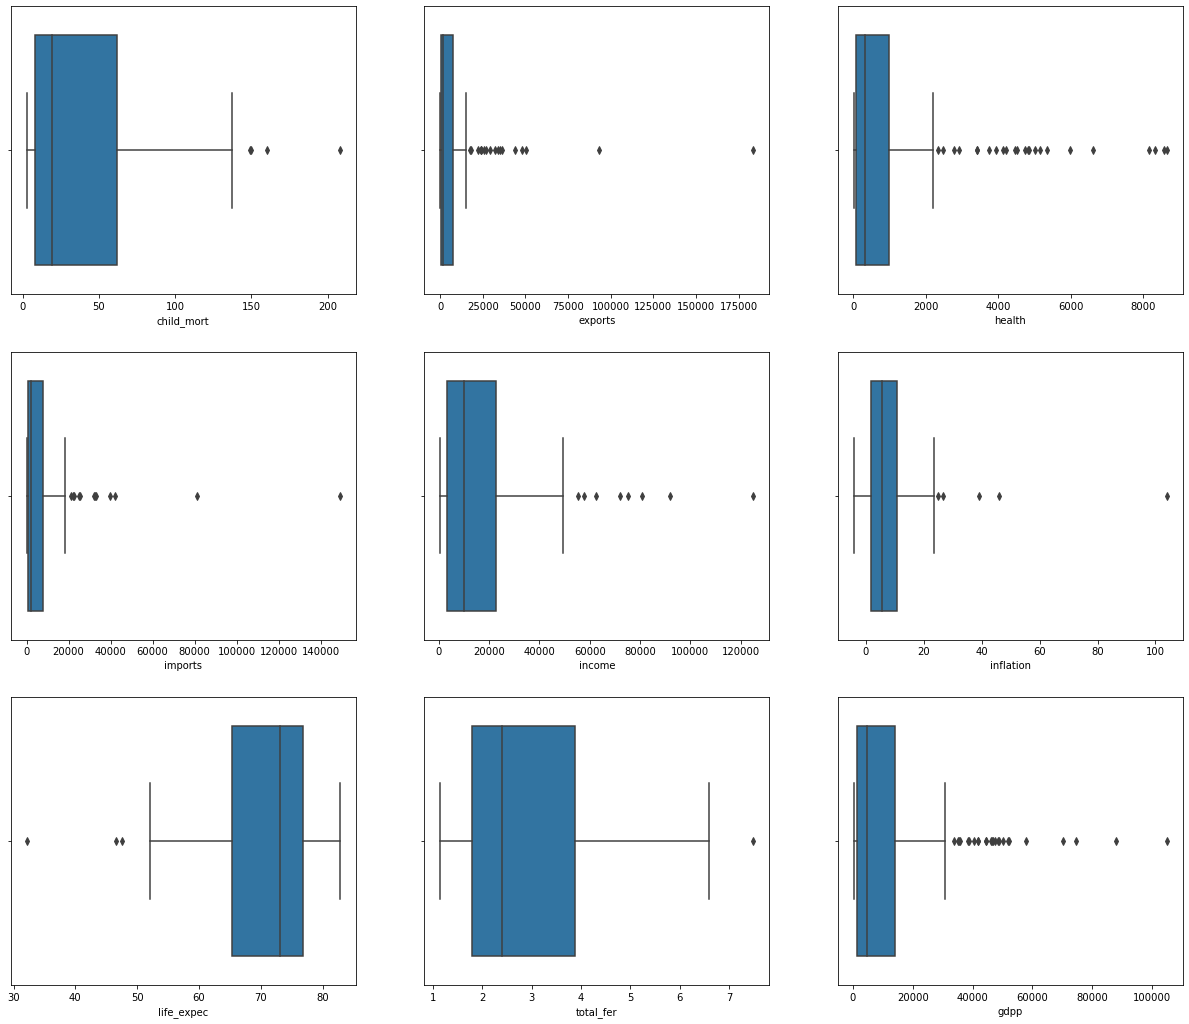

In [10]:
#Analysis of Outliers for the following column using Boxplot.
plt.figure(figsize = (21,18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

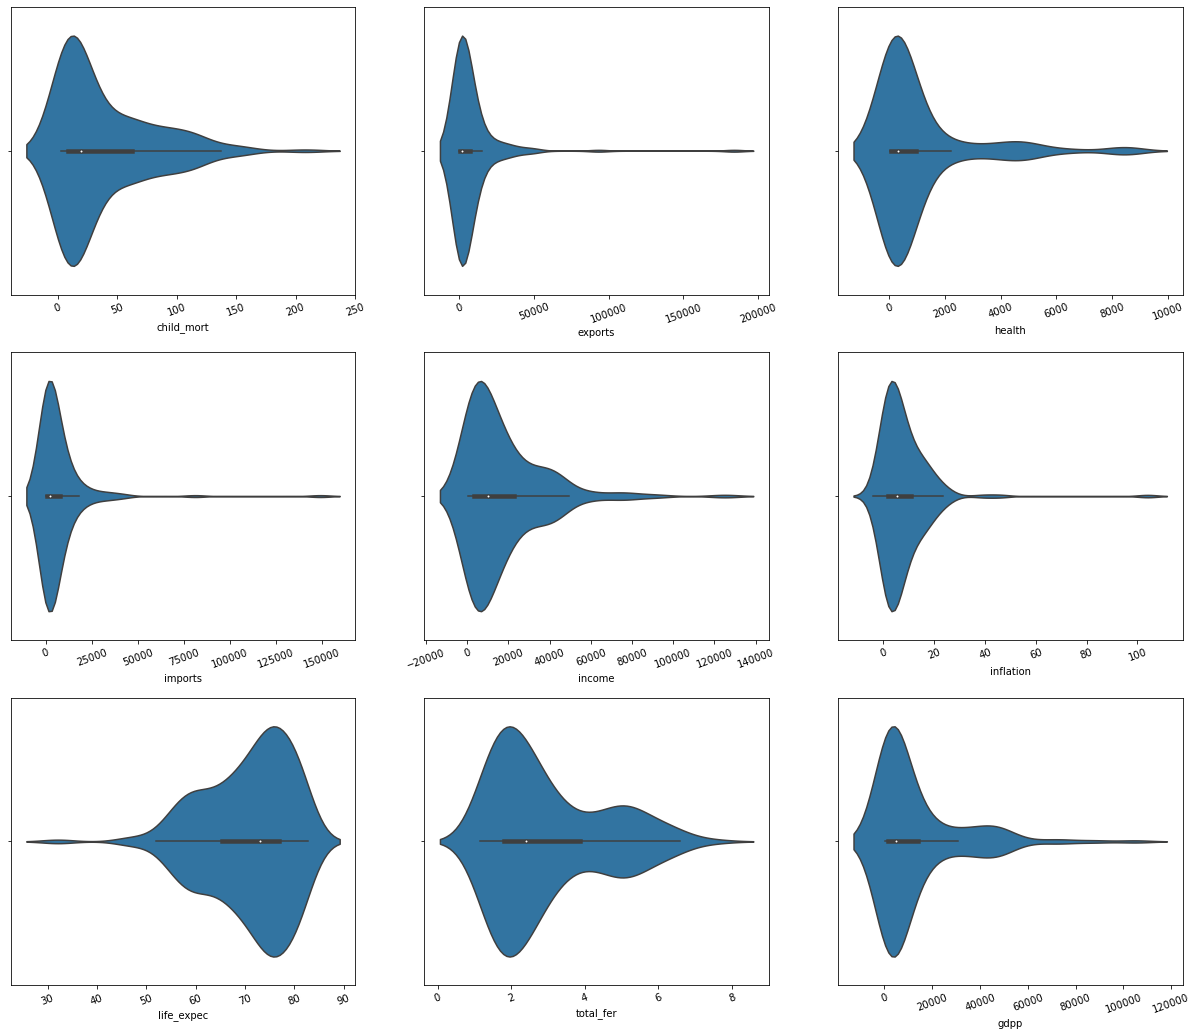

In [11]:
#Analysis of Outliers for the following column using Violin graph.
plt.figure(figsize=(21, 18))
num_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(num_var):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.violinplot(country_df[i[1]])
    plt.xticks(rotation=20)

#### Inference from above two plots:
> - All variables has some outliers.
> - If we apply the outliers treatment by deleting the outlier on this dataset,This may affect those countries which are in need of aid
> - Plan of action in this dataset is that we will apply soft Capping: we will use  1th and 99th percentile cutoff, which will least distrubing the data and the data will not get changed that much.

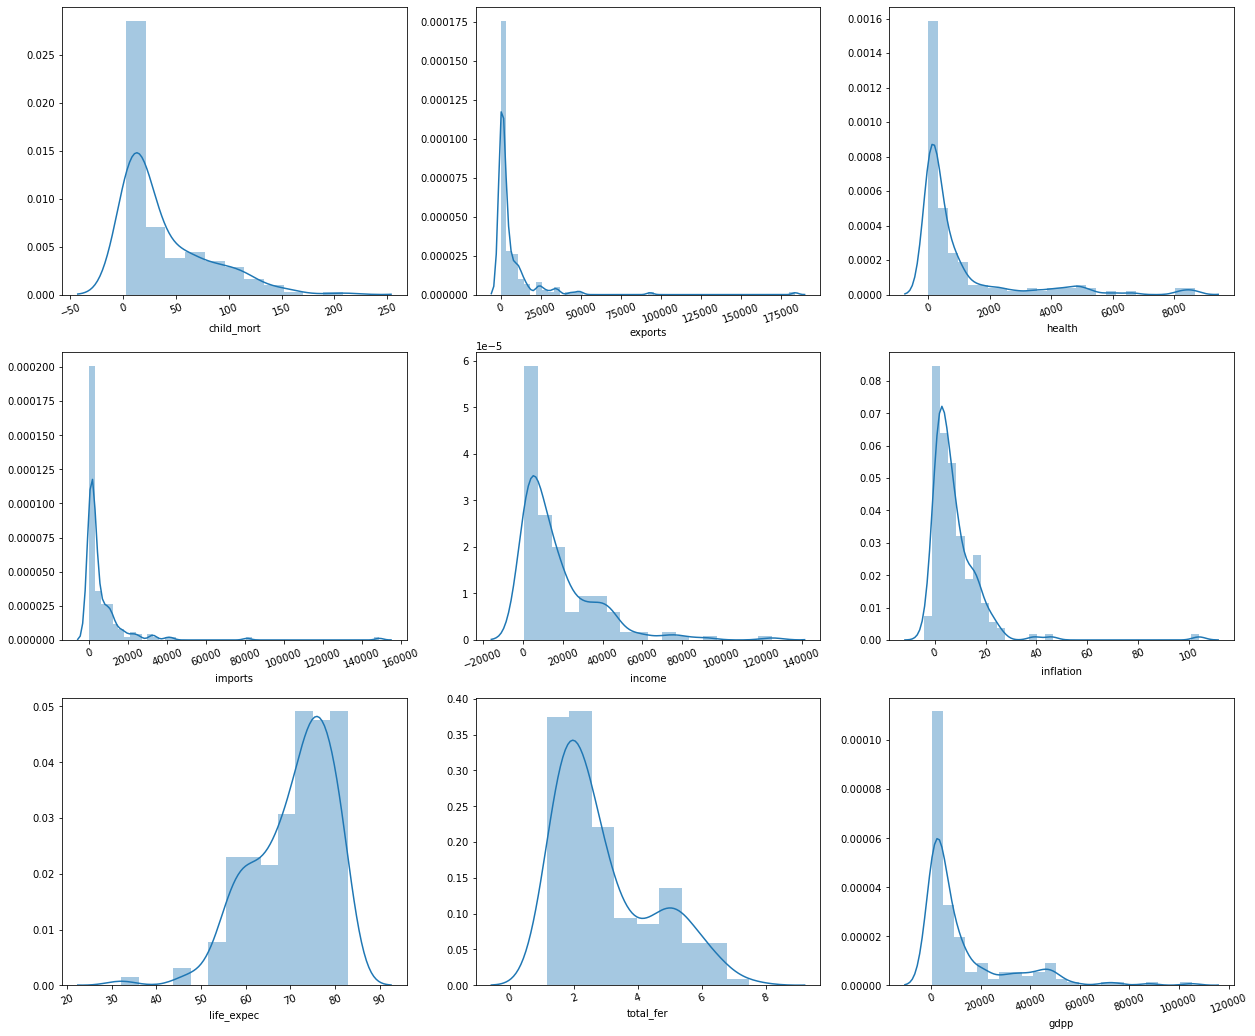

In [12]:
# Anslysis of columns using distplot
plt.figure(figsize=(21, 18))
num_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(num_var):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_df[i[1]])
    plt.xticks(rotation=20)

#### Inference:
> - Majority of the data points are not having Normal distribution except Inflation.Hence above dataset shows that there is presence of clusters.
> - life_expec has left shewed and all other datapoint are Right Shewed.
> - Variance is not uniform for all the data points.
> - Range is not same for all data points.
> - We need to standardize data to overcome all the above concerns.Since we need to calculate the Euclidean distance between the data points.
> - It is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

## 3.2 Bivariate Analysis

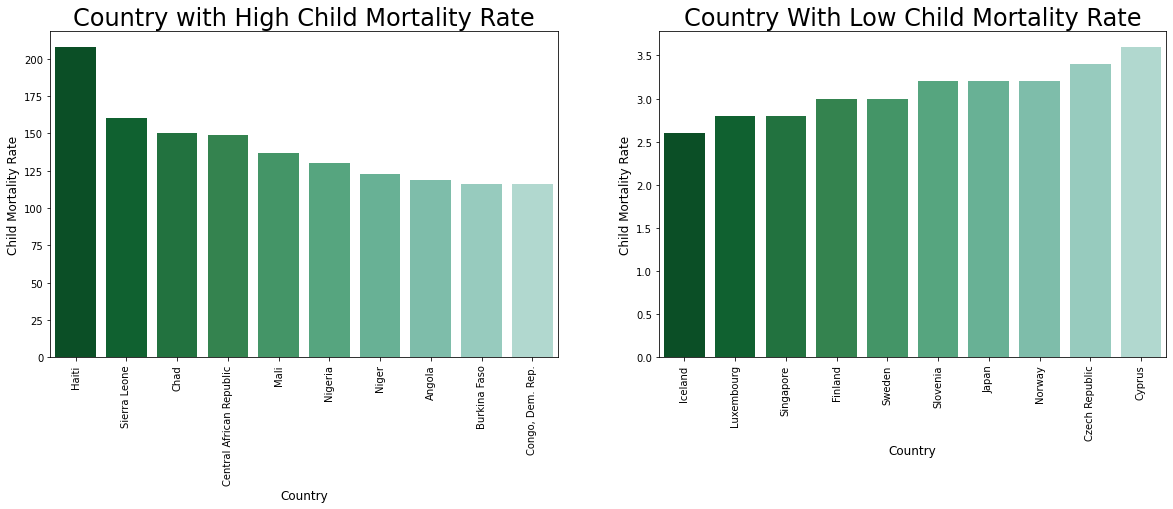

In [13]:
# Child Mortality Rate: Death of children under 5 years of age per 1000 live births
top_10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
bottom_10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_child_mort.country, top_10_child_mort.child_mort, palette=sns.color_palette("BuGn_r", n_colors=len(top_10_child_mort) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country with High Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_child_mort.country, bottom_10_child_mort.child_mort, palette=sns.color_palette("BuGn_r", n_colors=len(bottom_10_child_mort) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country With Low Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()



#### Inferenc:)
> - Both the graph indicates Top 10 countries and Bottom 10 Countries on the basis of Child mortality rate(Death of children under 5 years of age per 1000 live births)
> - First plot shows Haiti has the  highest Child mortality rate out of 167 countries given in the dataset followed by Sierra Leone, Chad, Central African  Republic, Mali, Nigeria, Niger, Angola, Burkina Faso and Congo,Dem,Rep.
> - Countries with High Child mortality rate indicates that they must have Very poor Health facility,Hence must have low per capita income. So,Countries mentioned above might in need of AID.
> - Second plot shows Iceland has the lowests Child mortality rate out of 167 countries given in the dataset followed by Luxembourg, Singapore, Finland, Sweden, Siovenia,Japan,Norway,Czech Republic and Cyprus.
> - If the countries has Low Child mortality rate indicates that countries must have Good Health facility might have high ver capita income. So,Countries mentioned above might not in need of AID.
> -  On the Basis of Child mortality rate Theses countries Haiti, Sierra Leone, Chad, Central African  Republic, Mali, Nigeria, Niger, Angola, Burkina Faso and Congo,Dem,Rep are in need of AID.

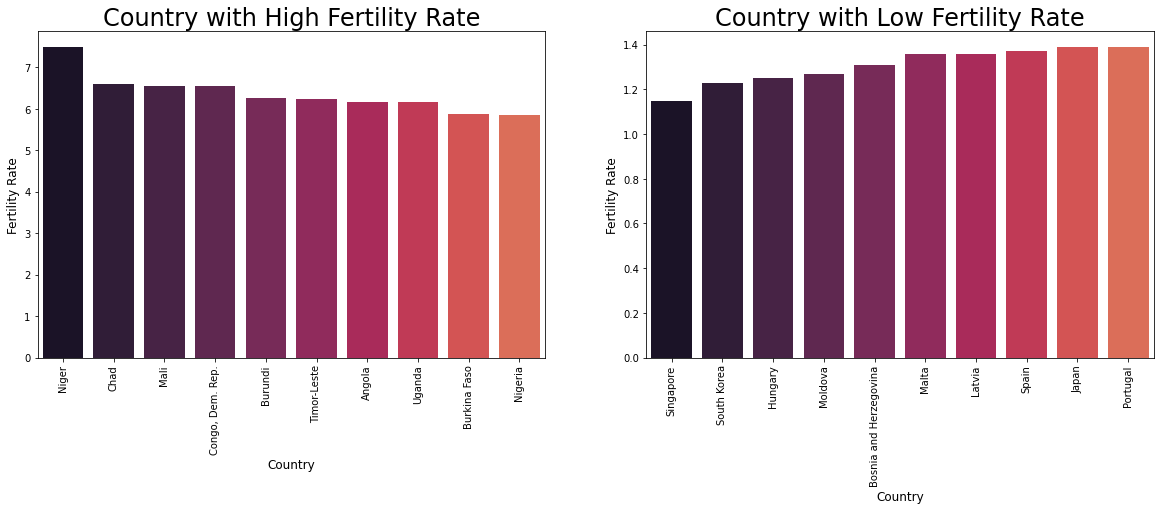

In [14]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top_10_fertility_rate = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
bottom_10_fertility_rate  = country_df[['country','total_fer']].sort_values('total_fer', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_fertility_rate.country, top_10_fertility_rate.total_fer, palette=sns.color_palette("rocket", n_colors=len(top_10_fertility_rate) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Fertility Rate" , size = 12 )
chart.set_title("Country with High Fertility Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_fertility_rate.country, bottom_10_fertility_rate.total_fer, palette=sns.color_palette("rocket", n_colors=len(bottom_10_fertility_rate) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Fertility Rate" , size = 12 )
chart.set_title("Country with Low Fertility Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

#### Inferenc:
> - Both the graph indicates Top 10 countries and Bottom 10 Countries on the basis of Fertility Rate(The number of children that would be born to each woman if the current age-fertility rates remain the same.)
> - First plot shows Niger has the  highest Fertility Rate out of 167 countries given in the dataset followed by Chad, Central African  Republic, Mali, Nigeria, Congo,Dem,Rep., Burundi, Timor-Leste, Angola, Uganda, Burkina Faso and  Nigeria.
> - Countries with High Fertility Rate indicates that per capita income of this countries will be low and If the per capita income is low there investment on Health care sector will be low Hence Health facility will be poor. So,Countries mentioned above might in need of AID.
> - Second plot shows Singapore has the lowests Fertility rate out of 167 countries given in the dataset followed by South Korea,  Hungary, Moldova, Bosina and Herzegovina, Malta, Latvia, Spain, Japan and  portugal.
> - Countries with Low Fertility rate indicates that per capita income of those countries must be high,Hence Health facility must good.So,Countries mentioned above might not in need of AID.
> -  On the Basis of Fertility rate Theses countries like Niger, Chad, Central African  Republic, Mali, Nigeria, Congo,Dem,Rep., Burundi, Timor-Leste, Angola, Uganda, Burkina Faso and  Nigeria. are in need of AID.

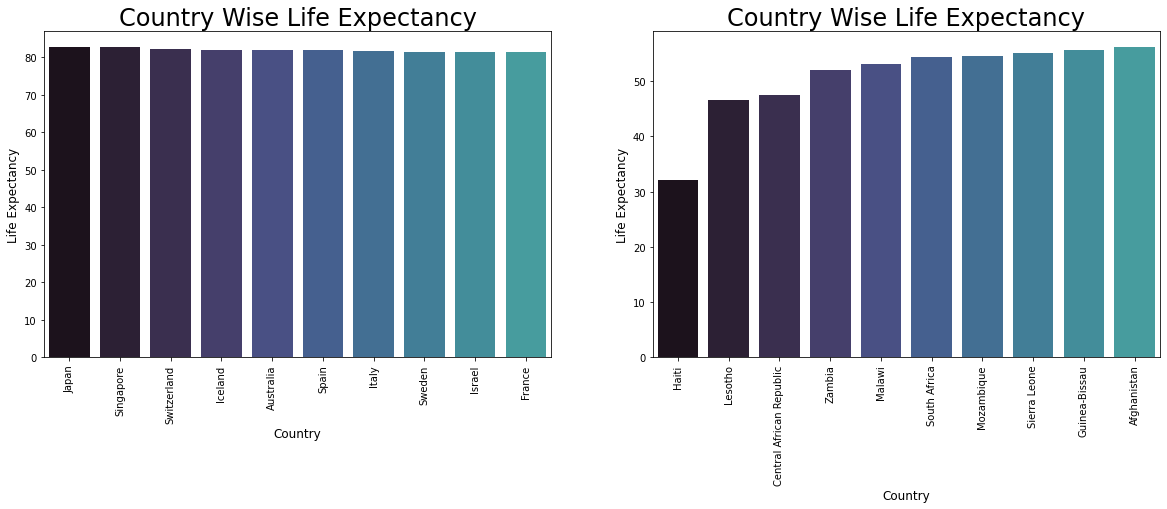

In [15]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
top_10_Life_Expectancy = country_df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
bottom_10_Life_Expectancy = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_Life_Expectancy.country, top_10_Life_Expectancy.life_expec, palette=sns.color_palette("mako", n_colors=len(top_10_Life_Expectancy) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Life Expectancy" , size = 12 )
chart.set_title("Country Wise Life Expectancy" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_Life_Expectancy.country, bottom_10_Life_Expectancy.life_expec, palette=sns.color_palette("mako", n_colors=len(bottom_10_Life_Expectancy) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Life Expectancy" , size = 12 )
chart.set_title("Country Wise Life Expectancy" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

#### Inferenc:
> - Both the graph indicates Top 10 countries and Bottom 10 Countries on the basis of  Life Expectancyy Rate(The number of children that would be born to each woman if the current age-fertility rates remain the same.)
> - First plot shows Japan has the  highest  Life Expectancy Rate out of 167 countries given in the dataset followed by Singapore, Switzerland, Icelan, Australia, Spain, Italy, Sweden, Israel and France.
> - Countries with High  Life Expectancy Rate indicates that Health facility is good and High per capita income. So,Countries mentioned above might not in need of AID.
> - Second plot shows Haiti	 has the lowests  Life Expectancy rate out of 167 countries given in the dataset followed by Lesotho,Central Africa Republic, Zambia,Malawi,South Africa,Mozambique,Sierra Leone,Guines-Bissau and Afghanistan.
> - Countries with Low Life Expectancy rate indicates that the Health facility is very poor and Low per capita income.So,Countries mentioned above might  in need of AID.
> -  On the Basis of  Life Expectancy rate Theses countries Haiti, Lesotho,Central Africa Republic, Zambia,Malawi,South Africa,Mozambique,Sierra Leone,Guines-Bissau and Afghanistanare in need of AID.

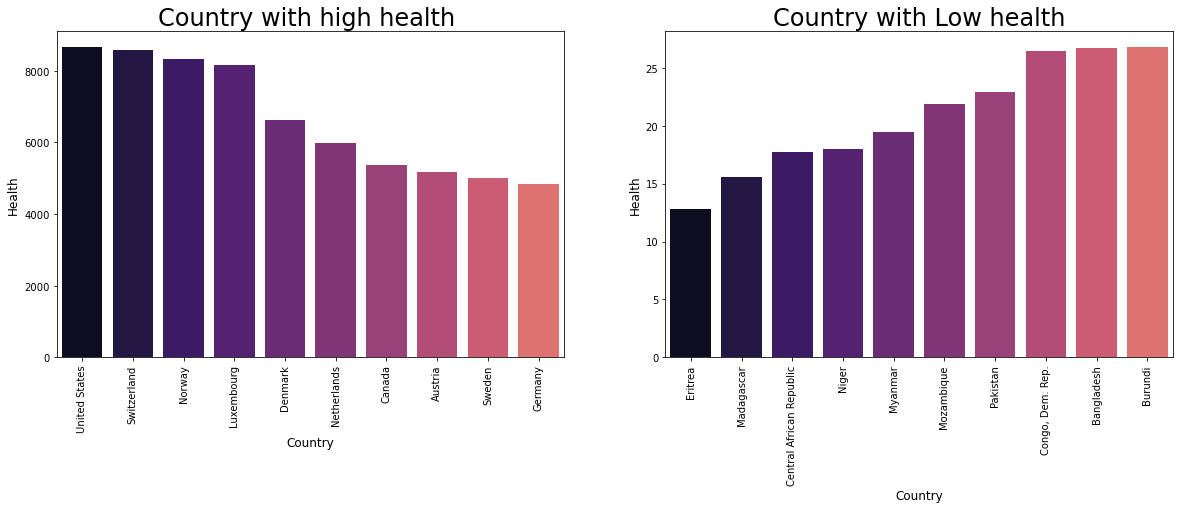

In [16]:
# Health :Total health spending as %age of Total GDP.
top_10_Health = country_df[['country','health']].sort_values('health', ascending = False).head(10)
bottom_10_Health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_Health.country, top_10_Health.health, palette=sns.color_palette("magma", n_colors=len(top_10_Health) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Health" , size = 12 )
chart.set_title("Country with high health " , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_Health.country, bottom_10_Health.health, palette=sns.color_palette("magma", n_colors=len(bottom_10_Health) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Health" , size = 12 )
chart.set_title("Country with Low health" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inference :
> - Both the graph indicates Top 10 countries and Bottom 10 Countries on the basis of Heailth spending (Total health spending per capita. Given as %age of GDP per capita.)
> - First plot shows United States has the  highest health spending out of 167 countries given in the dataset followed by Switzerland, Norway, Luxemberg, Denmark, Nertherlands, Canada, Austria, Sweden and Germany.
> - Countries with High health spending indicates that Health facility is good and High per capita income. So,Countries mentioned above might not in need of AID.
> - Second plot shows Eritrea has the lowests Health facility out of 167 countries given in the dataset followed by Madagascar, Central Africa Republic, Niger, Myanmar, Mozambique, Pakistan, Congo,Dem,Repo., Bangladesh and Burundi.
> - Countries with Low Health spending  indicates that the Health facility is very poor and Low per capita income.So,Countries mentioned above might in need of AID.
> -  On the Basis of  Life Expectancy rate Theses countries Eritrea, Madagascar, Central Africa Republic, Niger, Myanmar, Mozambique, Pakistan, Congo,Dem,Repo., Bangladesh and Burundi are in need of AID.

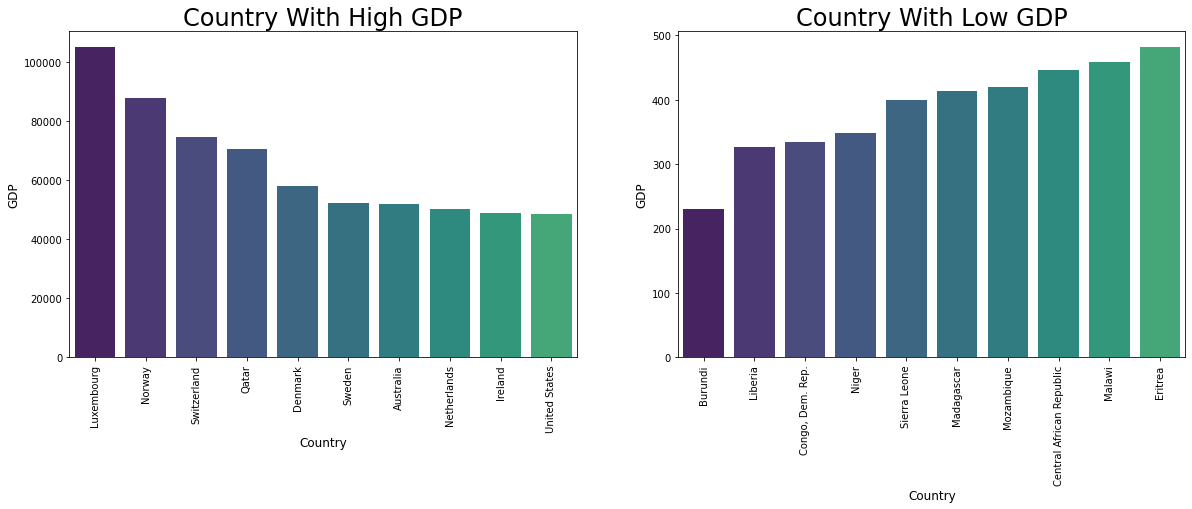

In [17]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
top_10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
bottom_10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_gdpp.country, top_10_gdpp.gdpp, palette=sns.color_palette("viridis", n_colors=len(top_10_gdpp) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("GDP" , size = 12 )
chart.set_title("Country With High GDP" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_gdpp.country, bottom_10_gdpp.gdpp, palette=sns.color_palette("viridis", n_colors=len(bottom_10_gdpp) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("GDP" , size = 12 )
chart.set_title("Country With Low GDP" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inference:
> - Both the graph indicates Top 10 countries and Bottom 10 Country on the basis of GDP.
> - First plot shows Norway has the  highest GDP out of 167 countries given in the dataset followed by Luxembourg,Switzerland,Qatar,Denmark,Sweden,Australia,Netherlands,Ireland and United States.
> - Countries has High GDP indicate per capita income is high and good Health facility. So,Countries mentioned above might not be in need of AID.
> - Second plot shows Burundi has the lowests GDP out of 167 countries given in the dataset followed by Liberia,Congo, Dem. Rep.,Niger,Sierra Leone,Madagascar,Mozambique,Central African Republic,Malawi,Malawi and Eritrea.
> - Countries has Low GDP indicates per capita income is low and very poor Health facility. So,Countries mentioned above might in need of AID.
> -  On the Basis of GDP Theses countries Burundi, Liberia,Congo, Dem. Rep.,Niger,Sierra Leone,Madagascar,Mozambique,Central African Republic,Malawi,Malawi and Eritrea are in need og Aid.

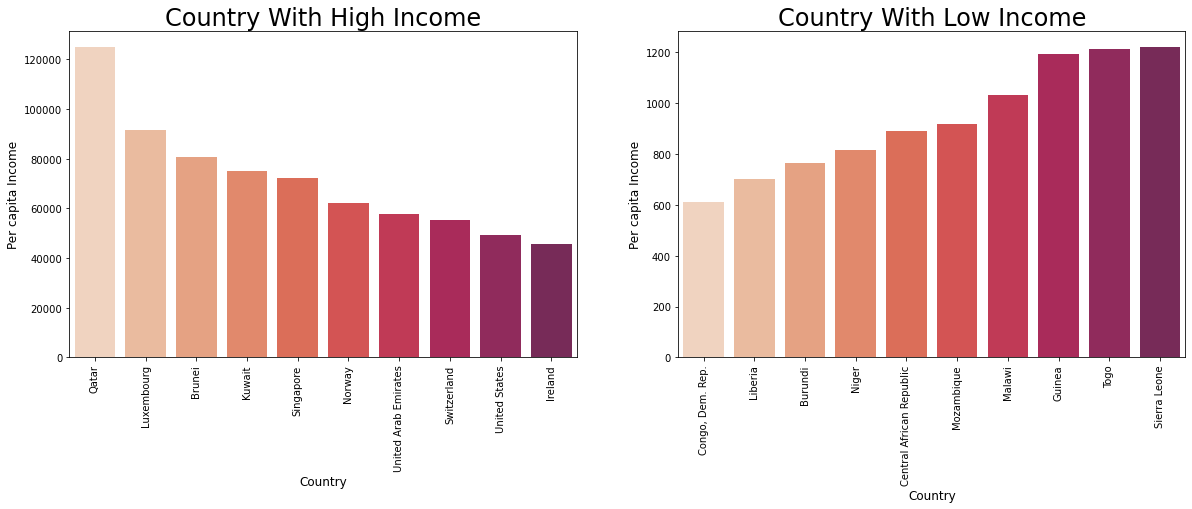

In [18]:
# Income : Net income per person
top_10_income = country_df[['country','income']].sort_values('income', ascending = False).head(10)
bottom_10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_income.country, top_10_income.income, palette=sns.color_palette("rocket_r", n_colors=len(top_10_income) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Per capita Income" , size = 12 )
chart.set_title("Country With High Income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_income.country, bottom_10_income.income, palette=sns.color_palette("rocket_r", n_colors=len(bottom_10_income) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Per capita Income" , size = 12 )
chart.set_title("Country With Low Income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inference:
> - Both the graph indicates Top 10 countries and Bottom 10 Country on the basis of Per capita Income.
> - First plot shows Luxembourg has the  highest GDP out of 167 countries given in the dataset followed by Qatar,Brunel, Kuwait, Singapore, Norway, United Arab Emirates, Switzerland, United States and Ireland.
> - Countries has High Income indicate Country is well developed country and has good Health Facility. So,Countries mentioned above might not be in need of AID.
> - Second plot shows Congo, Dem. Rep has the lowests Income out of 167 countries given in the dataset followed by Liberia, Burundi, Niger,Central African Republic, Mozambique Malawi,Guinea tago and Sierra Leone.
> - Countries has Low Income  indicates countries are under developed countries with very poor Health facility,Low GDP, High fertility rate and low life expectency. So,Countries mentioned above might in need of AID.
> -  On the Basis of Income Theses countries Congo, Dem. Rep,  Liberia, Burundi, Niger,Central African Republic, Mozambique Malawi,Guinea tago and Sierra Leone. are in need og Aid.

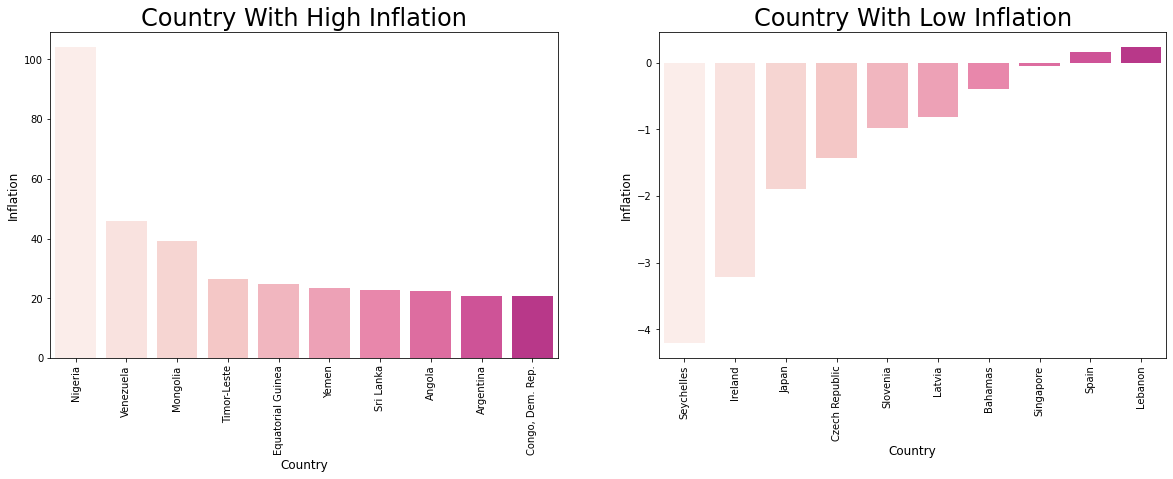

In [19]:
# Inflation: The measurement of the annual growth rate of the Total GDP
top_10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
bottom_10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_inflation.country, top_10_inflation.inflation, palette=sns.color_palette("RdPu", n_colors=len(top_10_inflation) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Inflation" , size = 12 )
chart.set_title("Country With High Inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_inflation.country, bottom_10_inflation.inflation, palette=sns.color_palette("RdPu", n_colors=len(bottom_10_inflation) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Inflation" , size = 12 )
chart.set_title("Country With Low Inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inference:
> - Both the graph indicates Top 10 countries and Bottom 10 Country on the basis of Inflation (The measurement of the annual growth rate of the Total GDP.)
> - First plot shows Nigeria has the  highest Inflation out of 167 countries given in the dataset followed by Venezuela, Mongolia, Timor-Leste, Yemen, Srilanka, Angola and Congo,Dem Rep.
> - Countries has High Inflation indicate increase per capita income of these countries will very Low and the countries are under developed countries. So,Countries mentioned above might in need of AID.
> - Second plot shows Seychelles has the lowests Inflation out of 167 countries given in the dataset followed by Ireland, Japan, Czech Republic, Slovenia, Latvia, Bahamas, Singapore, Spain and Lebanon.
> - Countries has Low Inflation indicates per capita income of these countries are high and these countries are developed countries. So,Countries mentioned above might in need of AID.
> -  On the Basis of Inflation Theses countries Nigeria, Venezuela, Mongolia, Timor-Leste, Yemen, Srilanka, Angola and Congo,Dem Rep. are in need og Aid.

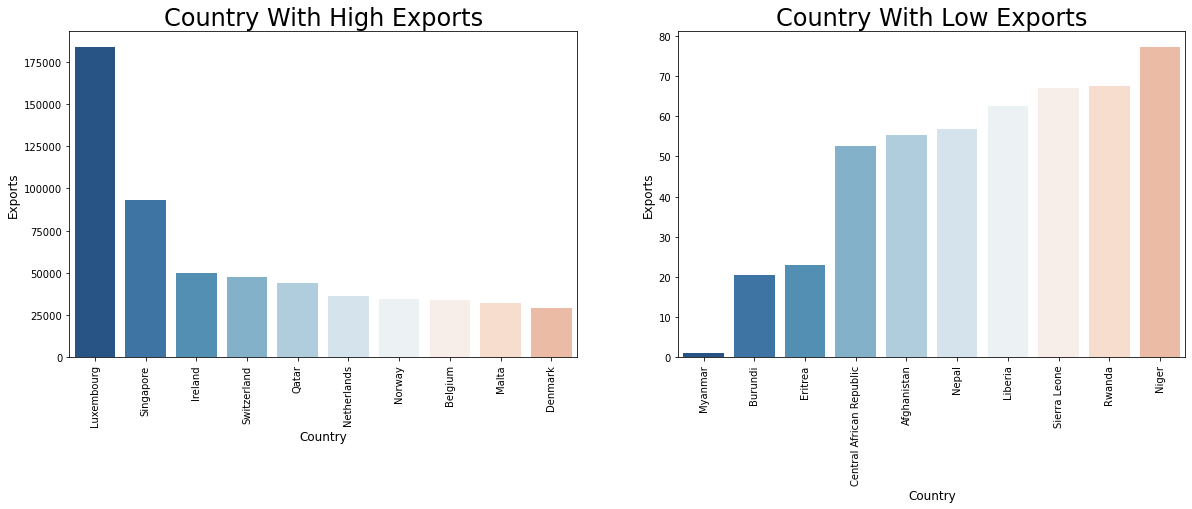

In [20]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
top_10_export = country_df[['country','exports']].sort_values('exports', ascending = False).head(10)
bottom_10_export = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_export.country, top_10_export.exports, palette=sns.color_palette("RdBu_r", n_colors=len(top_10_export) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Exports" , size = 12 )
chart.set_title( "Country With High Exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_export.country, bottom_10_export.exports, palette=sns.color_palette("RdBu_r", n_colors=len(bottom_10_export) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Exports" , size = 12 )
chart.set_title( "Country With Low Exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


#### Inference:
> - Both the graph indicates Top 10 countries and Bottom 10 Country on the basis of Exports.
> - First plot shows Luxembourg has the  highest Exports out of 167 countries given in the dataset followed by Singapore,Ireland, Switzerland, Qatar, Nertherlands, Belgium, Malta, and denmark.
> - Countries has High Exports indicate countries has high per capita income and High GDP. So,Countries mentioned above might not be in need of AID.
> - Second plot shows Myannmar has the lowests Exports out of 167 countries given in the dataset followed by Liberia, Burundi, Eritrea, Central African Republic, Afghanistan, Nepal, Lineria, Sierra lene, Rwanda and Niger.
> - Countries has Low Exports  indicates countries has low per capita income and Low GDP. So,Countries mentioned above might in need of AID.
> -  On the Basis of Exports Theses countries Myannmar,  Liberia, Burundi, Eritrea, Central African Republic, Afghanistan, Nepal, Lineria, Sierra lene, Rwanda and Niger are in need og Aid.


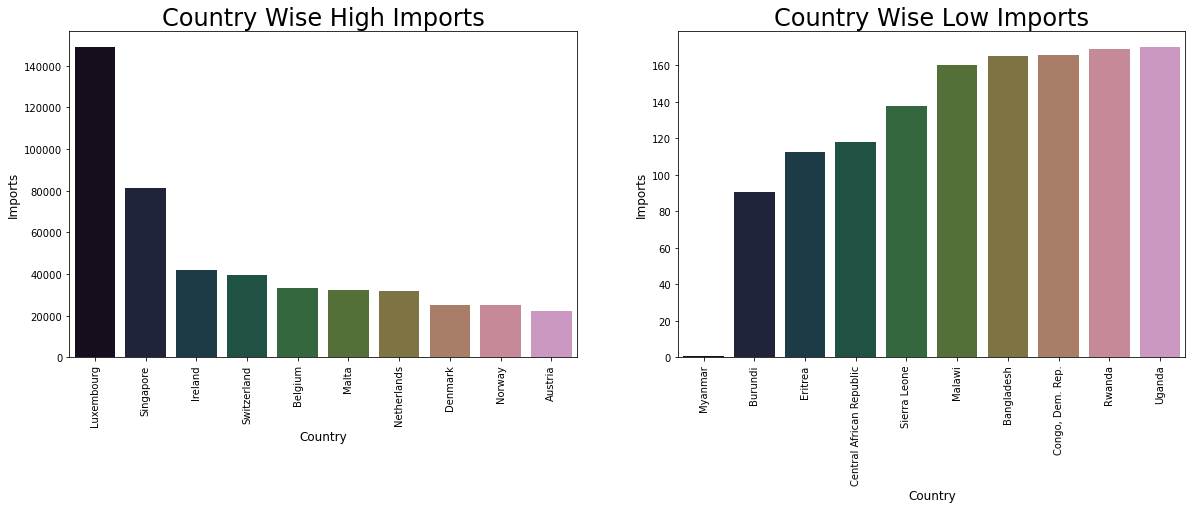

In [21]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
top_10_import = country_df[['country','imports']].sort_values('imports', ascending = False).head(10)
bottom_10_import = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_import.country, top_10_import.imports, palette=sns.color_palette("cubehelix", n_colors=len(top_10_import) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Imports" , size = 12 )
chart.set_title( "Country Wise High Imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_import.country, bottom_10_import.imports, palette=sns.color_palette("cubehelix", n_colors=len(bottom_10_import) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Imports" , size = 12 )
chart.set_title( "Country Wise Low Imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


#### Inference:
> - Both the graph indicates Top 10 countries and Bottom 10 Country on the basis of Imports.
> - First plot shows Singapore has the  highest Imports out of 167 countries given in the dataset followed by Luxembourg, Ireland, Switzerland, Belgium,Malta, Nertherlands, Denmark, Norway and Austria.
> - Countries has High Imports indicate countries has high per capita income and High GDP. So,Countries mentioned above might not be in need of AID.
> - Second plot shows Myannmar has the lowests Imports out of 167 countries given in the dataset followed by  Burundi, Eritrea, Central African Republic, Sierra Leone, Malawi, Bangaldesh,Congo.Dem.Rep., Rwanda and Uganda
> - Countries has Low Imports  indicates countries has low per capita income and Low GDP. So,Countries mentioned above might in need of AID.
> - On the Basis of Imports Theses countries Myannmar,  Liberia, Burundi, Eritrea, Central African Republic, Sierra Leone, Malawi, Bangaldesh,Congo.Dem.Rep., Rwanda and Uganda are in need og Aid.

## 3.3 Multivariate Analysis

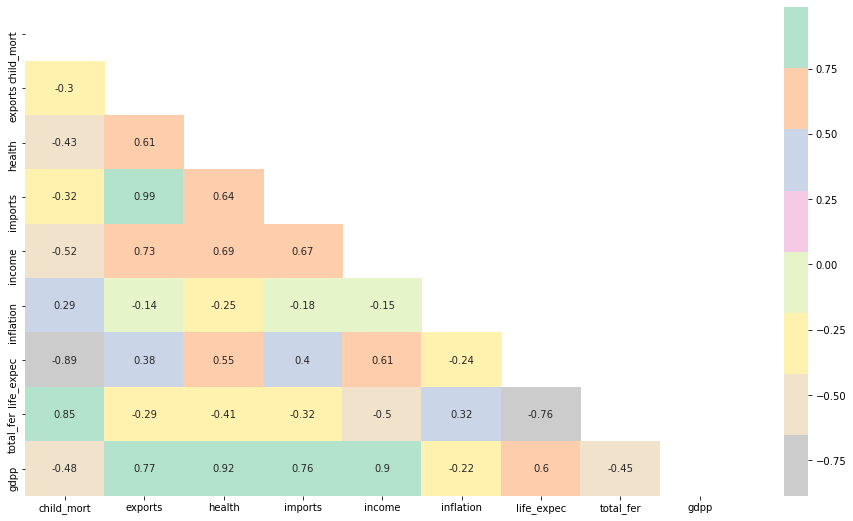

In [22]:
# check the correlation coefficients to see which variables are highly correlated

corr = country_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Pastel2_r', annot = True)

plt.show()

#### Inference:
> - child_mortality and life_expentency are highly and inversely correlated with correlation of -0.89
> - child_mortality and total_fertility are highly correlated with correlation of 0.85 life_expentency and total_fertility are highly correlated with correlation of -0.76
> - Imports and Exports are highly correlated with correlation of 0.99
> - health and gdpp are highly correlated with correlation of 0.92
> - income and gdpp are highly correlated with correlation of 0.9
> - gdpp and exports are highly correlated with correlation of 0.77
> - gdpp and imports are highly correlated with correlation of 0.76

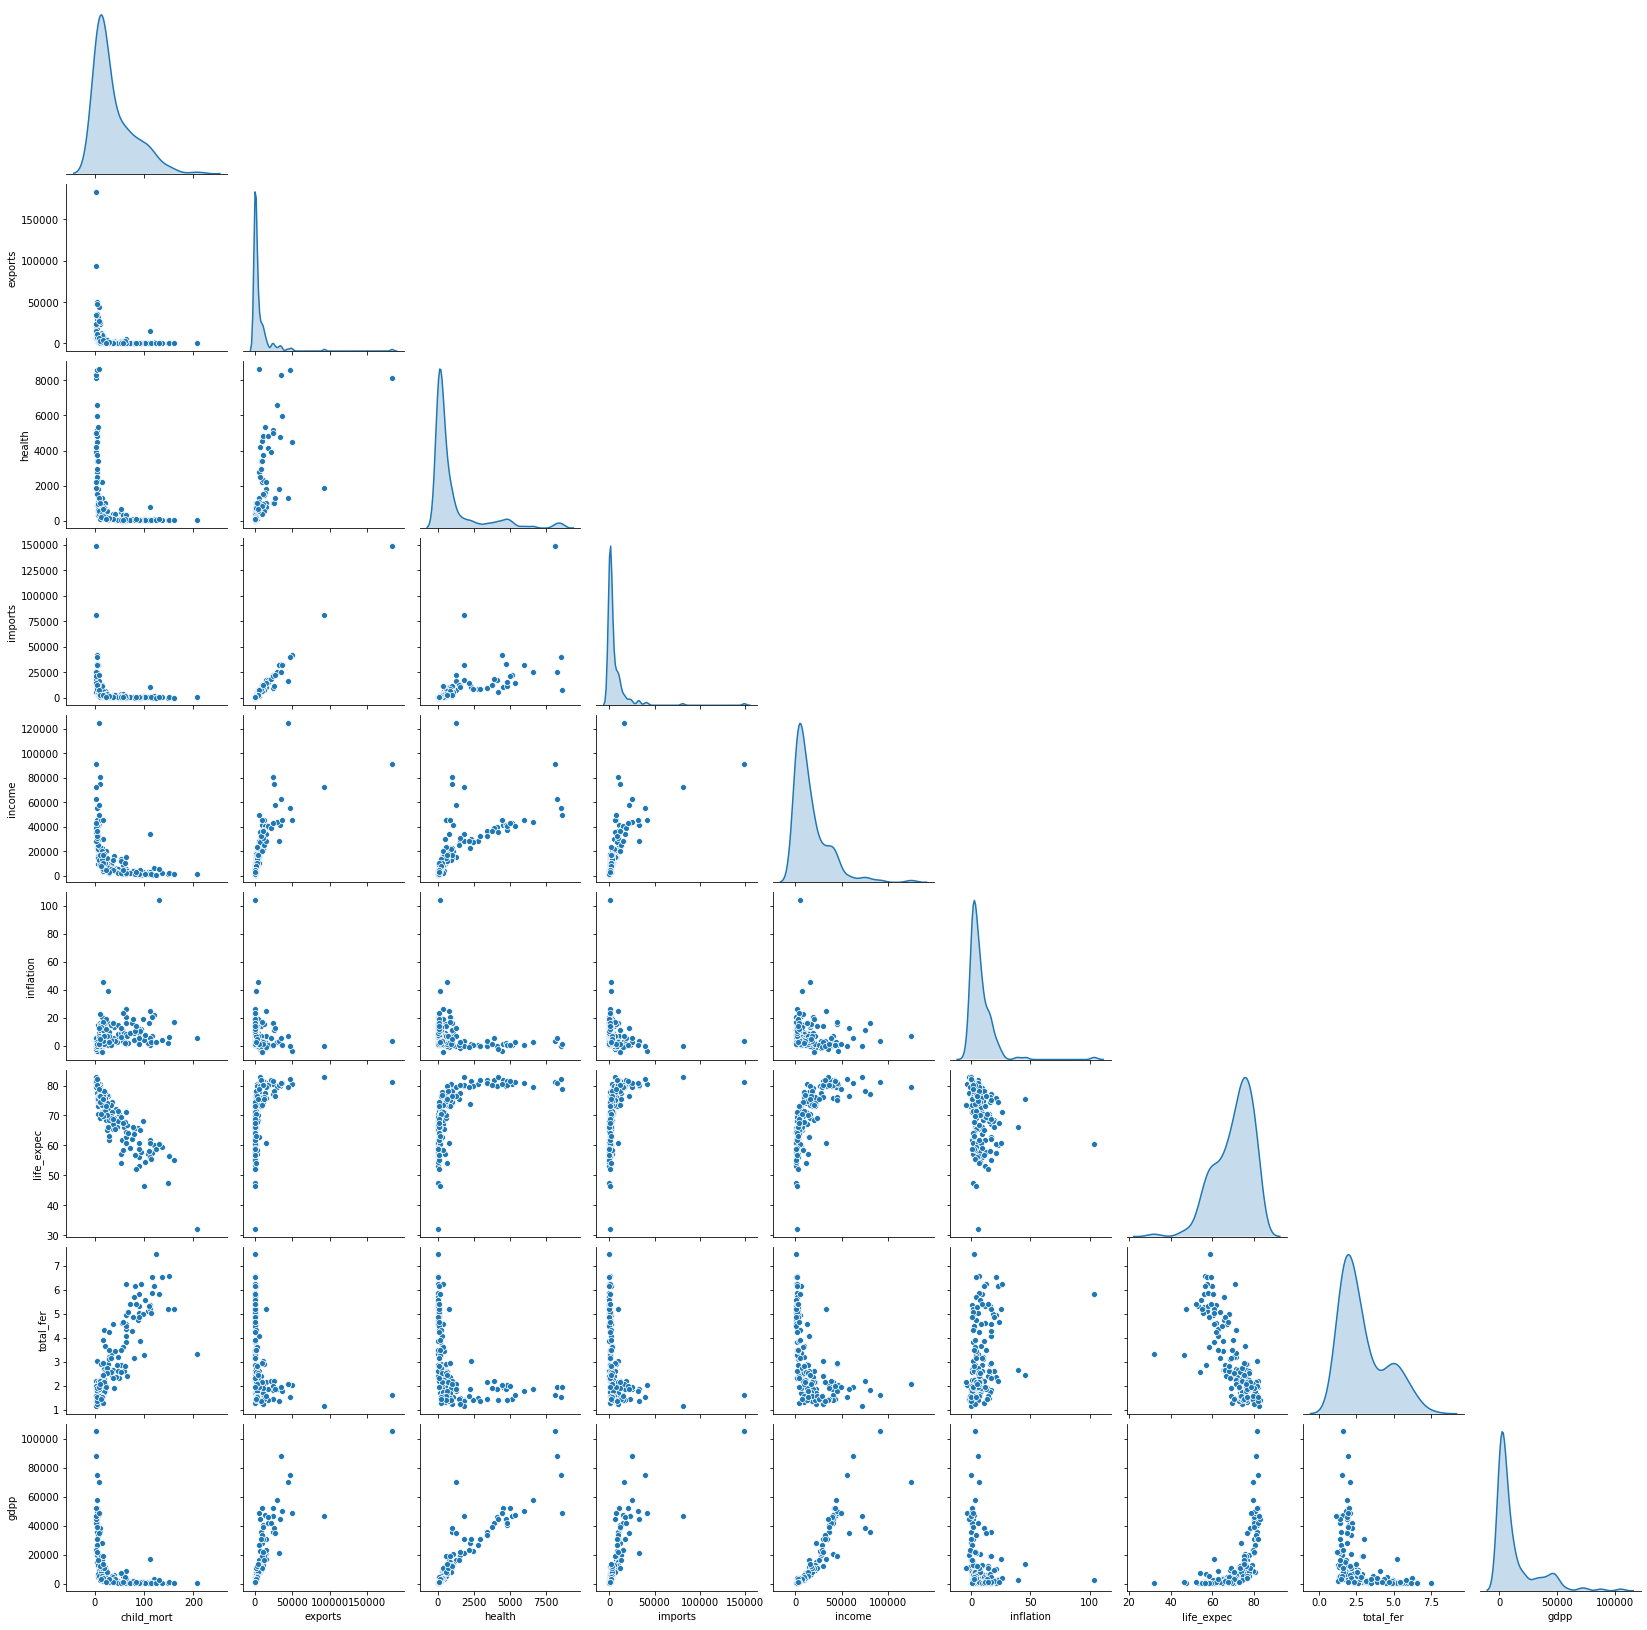

In [23]:
# pairplot for continuous data type
sns.pairplot(country_df.select_dtypes(['int64','float64']), diag_kind='kde', corner=True)
plt.show()

#### Inference:
> - child_mort and total_fer show linear relation between them.
> - child_mort and life_expec are kind of inversely proportion to each other.
> - child_mort seems to be high where health spending is low and inflation is high
> - When health spending is more, life_expect is high.
> - gdpp increases as exports, imports, income increase.
> - gdpp and health spending show linear relation between them 

# 4 Data Preparation For Modelling 

## 4.1 Outlier Treatment

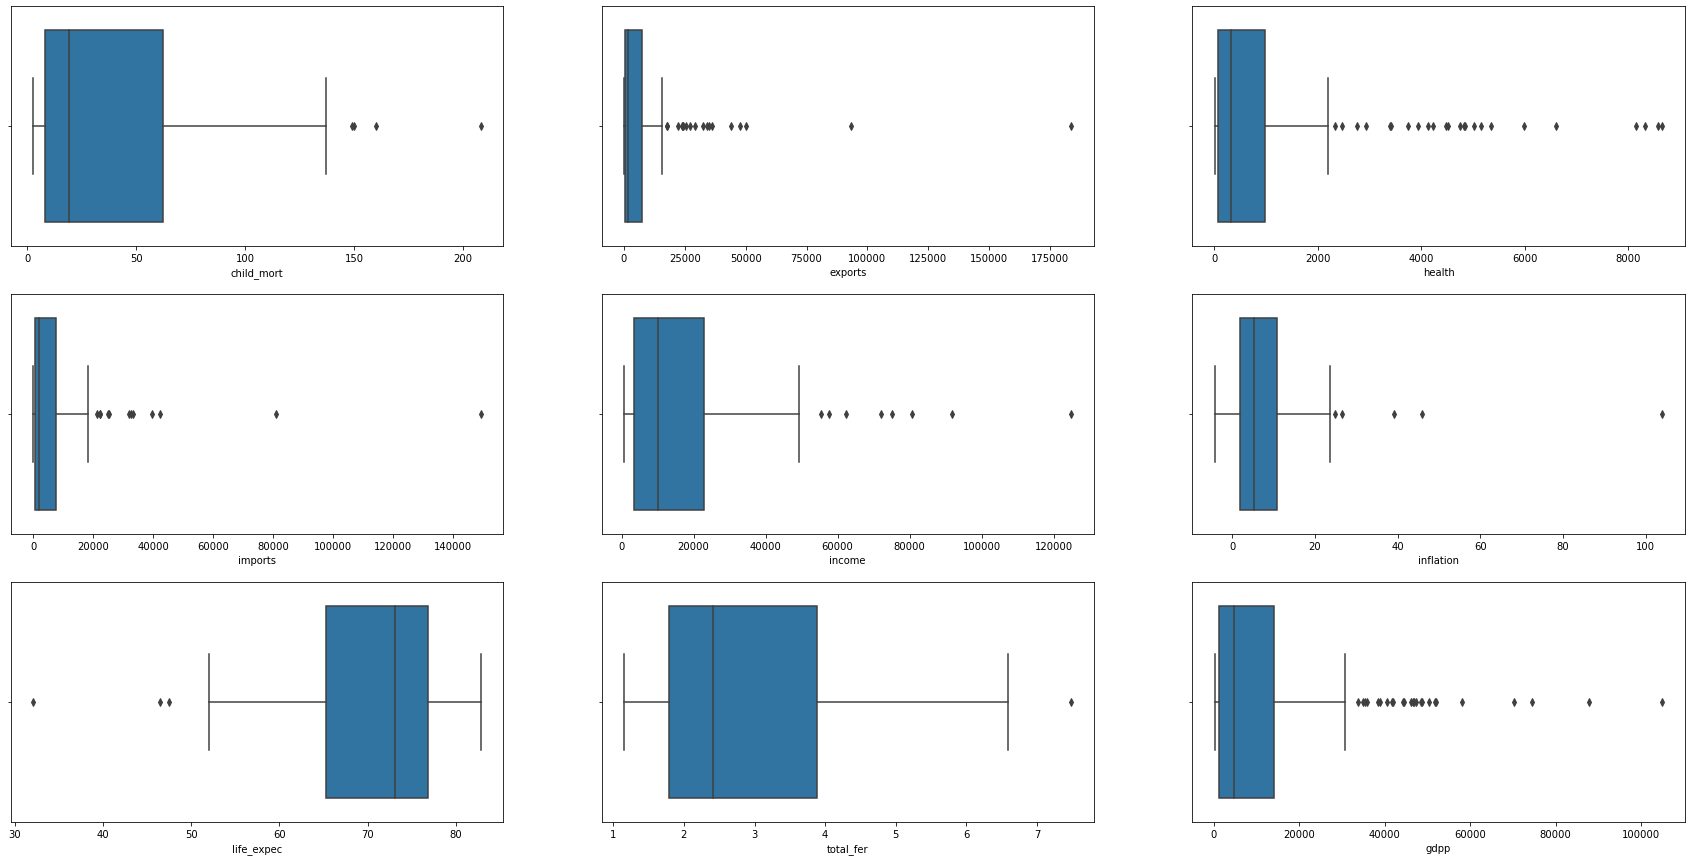

In [24]:
# Outliers Treatment
plt.figure(figsize = (30,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

#### Inference:
> - All variables has some outliers.
> - We will be doing Soft capping as the data points are few and the capping should not influence the clusters much.

In [25]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


##### Point to Note Before Outlier Treatment:
- child_mort has outlier in the upper side of the Box plot. And Higher Value of child_mort is critical for those countries which are in need of Aid ,Hence we will not  cap in child_mort.
- life_expec has outlier in the lower side of the Box plot, And lower value of life_expec generally shows Lower income and Lower spent in helthcare sector. Hence We will keep it as it is.
- For exports,health,imports,income,total_fer,gdpp,Inflation we will apply soft capping in the upper quatile of 0.99 and No Lower capping for Outliers.

In [26]:
#finding the 99th percentile value to cap
upper_gdpp = country_df['gdpp'].quantile(0.99)
upper_income = country_df['income'].quantile(0.99)
upper_health = country_df['health'].quantile(0.99)
upper_import = country_df['imports'].quantile(0.99)
upper_export = country_df['exports'].quantile(0.99)
upper_inflation = country_df['inflation'].quantile(0.99)

# capping the gdpp and income values
country_df['gdpp'][country_df['gdpp']>upper_gdpp] = upper_gdpp
country_df['income'][country_df['income']>upper_income] = upper_income
country_df['health'][country_df['health']>upper_health] = upper_health
country_df['imports'][country_df['imports']>upper_import] = upper_import
country_df['exports'][country_df['exports']>upper_export] = upper_export
country_df['inflation'][country_df['inflation']>upper_inflation]= upper_inflation

In [27]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.800000,7.490000,79088.000000


## 4.2 Data Scaling

>- Feature scaling is essential for machine learning algorithms that calculate distances between data.
Most of distance based models e.g. k-means and Hierarchical clustering need standard scaling so that large-scaled features don't dominate the variation.
If we do not scale, the feature with a higher value range starts dominating when calculating distances
We have chosen StandardScaler as clustering does not work well when the variance differs a lot.
StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. 

In [28]:
# Dropping the country columns and assigning the other column in new dataset called features
num_cols = country_df.drop(["country"],axis = 1)
features = num_cols.columns
num_cols.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [29]:
# Standard scaling
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(num_cols)
country_scaled

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [30]:
#Converting it into a dataframe
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = features

country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.541946,-0.032042


# PART-I

# 5 Model Building

## 5.1 Hopkins statistic

In [31]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
hopkins(country_scaled)

0.9136755774860692

### Hopkins score is more than 0.85  and closer to 1 which means our data has a high tendency to cluster.

# 6 Hierarchical Clustering

## 6.1 Single Linkage Hierarchical Clustering

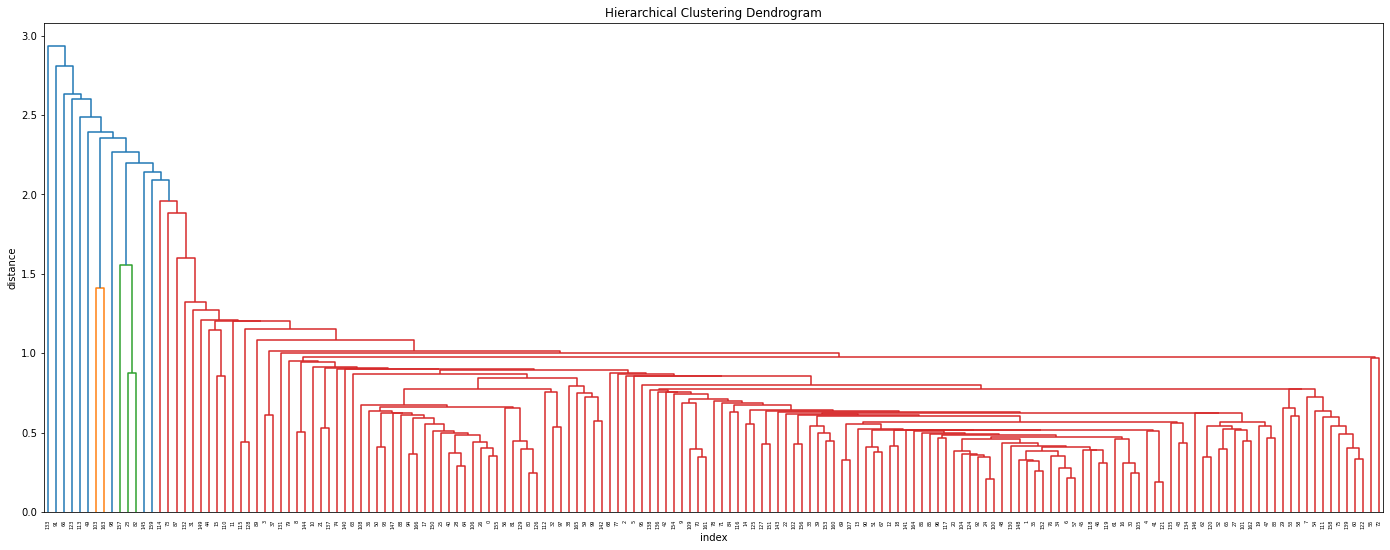

In [33]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(24, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

##### Inference :
- Single linkage Hierarchical Clustering doesnot gave us perfect result for clustering 

## 6.2 Complete Linkage Hierarchical Clustering

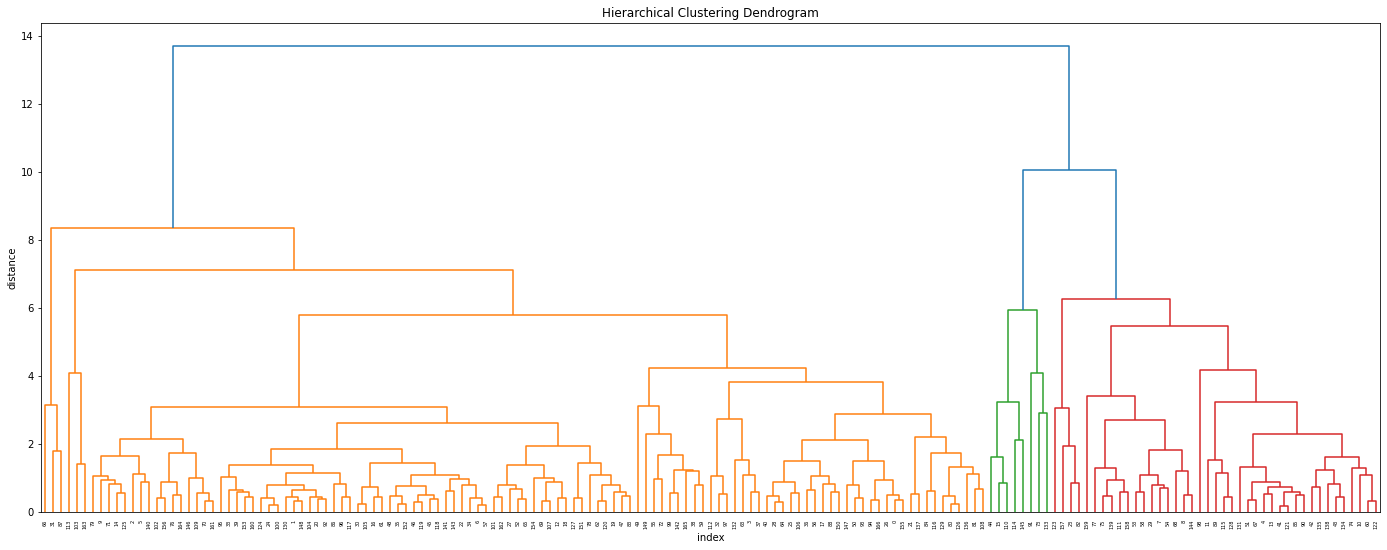

In [34]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

plt.figure(figsize=(24, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

##### Inference:
> - From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation.We will consider Complete linkage for further analysis
> -  We will build two iterations of clustering with 3 and 4 clusters and analyse the output.

## 6.3 First Iteration With Cluster = 3

In [35]:
# 3 Cluster
her_cluster_label_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
her_cluster_label_3

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [36]:
# assign cluster labels
country_df_her = country_df.copy()
country_df_her['her_cluster_label_3'] = her_cluster_label_3
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [37]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_label_3"].value_counts()

0    118
1     41
2      8
Name: her_cluster_label_3, dtype: int64

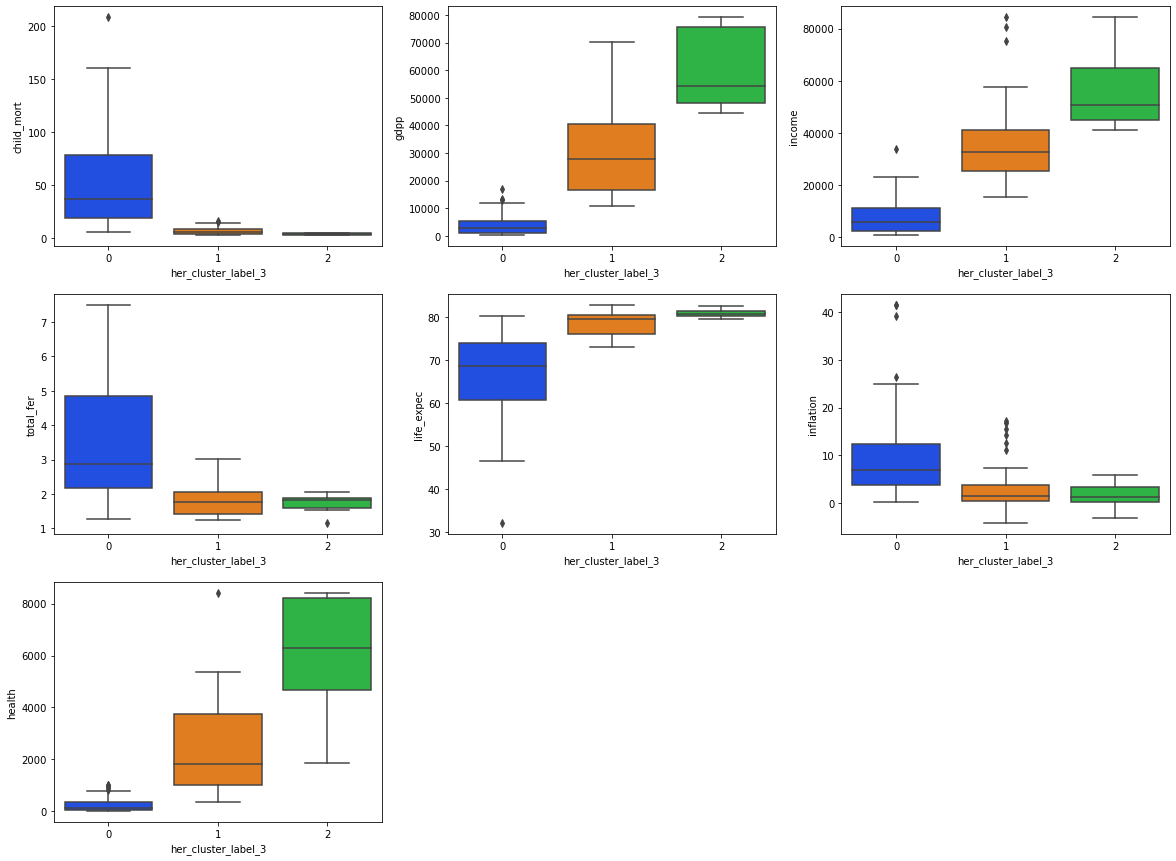

In [38]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='her_cluster_label_3', y='child_mort', data=country_df_her, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='her_cluster_label_3', y='gdpp', data=country_df_her, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='her_cluster_label_3', y='income', data=country_df_her, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='her_cluster_label_3', y='total_fer', data=country_df_her, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='her_cluster_label_3', y='life_expec', data=country_df_her, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='her_cluster_label_3', y='inflation', data=country_df_her, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='her_cluster_label_3', y='health', data=country_df_her, palette="bright")


plt.show()

#### Inference:
> - child_mort : Cluster 0 has High Child mortality rate where as Cluster 1 and 2 has medium and low respectively.
> - gdpp: Cluster 0 has very low GDp where as Cluster 1 has medium to High GDP and Cluster 2 has Very High GDP.
> - income: Cluster 0 has very low Income with few Outliers where Cluster 1 has medium  Income and Some High Income (outliers) and Cluster 2 has Very High Income
> - total_fer: Cluster 0 has very High fertility rate where has Cluster 1 has low and Cluster 2 has very low fertility rate.
> - life_expec: Cluster 0 has Life expectence between age from 40 to 80 where as Cluster 1 and 2 has life expectency beyond 80 also.
> - inflation: Cluster 0 has high inflation where as cluster 1 has low Inflation and cluster 2 has less then cluster 1 inflation rate.
> - health: Cluster 0 has very less amount of income spend in helth where as cluster 1 has medium and cluster 2 has high amount of income spend in health respectively.

In [39]:
# checking countries in cluster 2 

country_df_her[country_df_her['her_cluster_label_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2


In [40]:
# checking countries in cluster 1

country_df_her[country_df_her['her_cluster_label_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
4,Antigua and Barbuda,10.3,5551.0,735.6600,7185.8,19100.0,1.440,76.8,2.13,12200.0,1
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1
13,Barbados,14.2,6320.0,1275.2000,7792.0,15300.0,0.321,76.7,1.78,16000.0,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,1
41,Croatia,5.5,5076.0,1047.6000,5143.5,20100.0,0.821,76.3,1.55,13500.0,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,1


In [41]:
# checking countries in cluster 0

country_df_her[country_df_her['her_cluster_label_3'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


## 6.4 Second Iteration With Cluster = 4

In [42]:
# 4 Cluster
her_cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
her_cluster_labels_4

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# assign cluster labels
country_df_her['her_cluster_labels_4'] = her_cluster_labels_4
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [44]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_labels_4"].value_counts()

0    115
1     41
2      8
3      3
Name: her_cluster_labels_4, dtype: int64

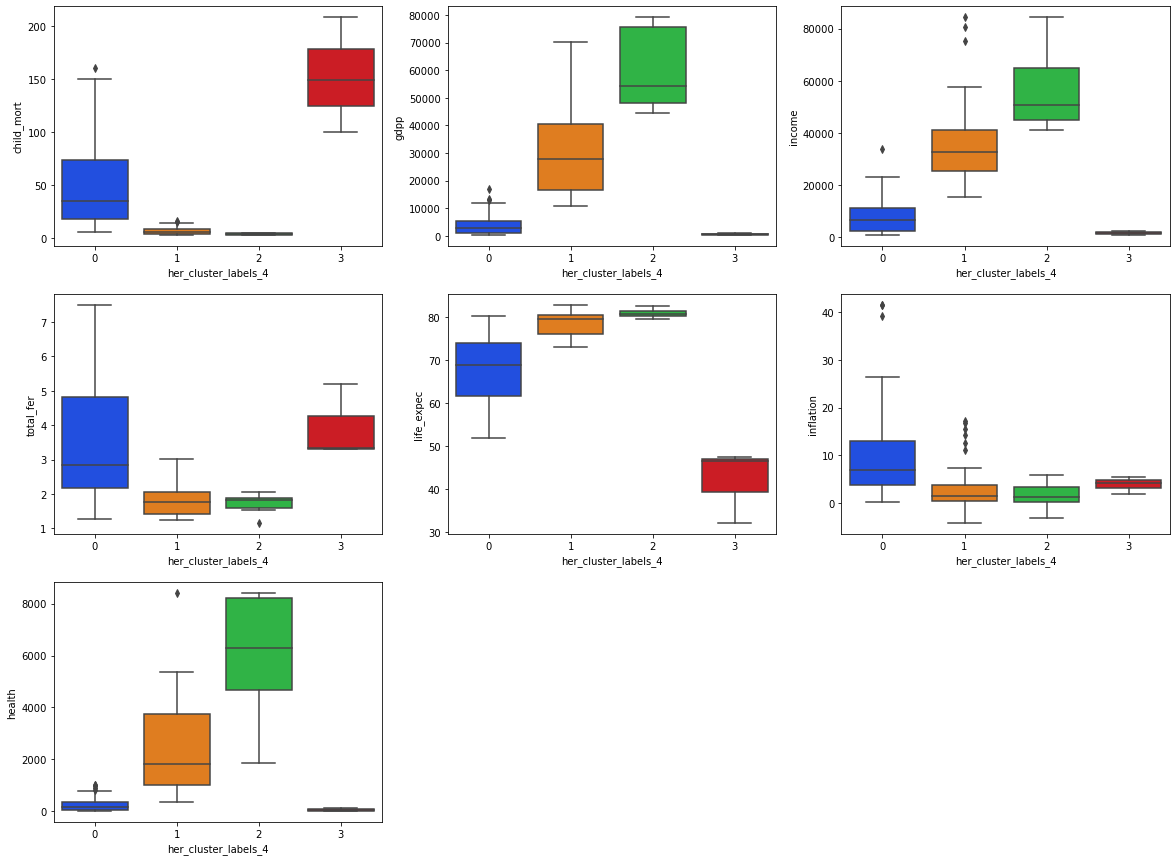

In [45]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='her_cluster_labels_4', y='child_mort', data=country_df_her, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='her_cluster_labels_4', y='gdpp', data=country_df_her, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='her_cluster_labels_4', y='income', data=country_df_her, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='her_cluster_labels_4', y='total_fer', data=country_df_her, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='her_cluster_labels_4', y='life_expec', data=country_df_her, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='her_cluster_labels_4', y='inflation', data=country_df_her, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='her_cluster_labels_4', y='health', data=country_df_her, palette="bright")


plt.show()

#### Inference:
> - In the second Iteration model has created a new cluster 3 with only three countries which has High Child mortality rate,High Fertility rate, Low life expectency,Low income and low GDP and Income.
> - The countries belongs to the cluster 3 can be consider to under-developed countries

In [46]:
# checking countries in cluster 3

country_df_her[country_df_her['her_cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,3
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0,3
87,Lesotho,99.7,460.980,129.8700,1181.700,2380.0,4.15,46.5,3.30,1170.0,0,3


In [47]:
# checking countries in cluster 2

country_df_her[country_df_her['her_cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,2
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,2
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,2


In [48]:
# checking countries in cluster 1

country_df_her[country_df_her['her_cluster_labels_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
4,Antigua and Barbuda,10.3,5551.0,735.6600,7185.8,19100.0,1.440,76.8,2.13,12200.0,1,1
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,1,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1,1
13,Barbados,14.2,6320.0,1275.2000,7792.0,15300.0,0.321,76.7,1.78,16000.0,1,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,1,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,1,1
41,Croatia,5.5,5076.0,1047.6000,5143.5,20100.0,0.821,76.3,1.55,13500.0,1,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,1,1


In [49]:
# checking countries in cluster 0

country_df_her[country_df_her['her_cluster_labels_4'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0,0


##### Inference:
- As from above two iteration we can conclude that the cluster = 3 has ideal number of cluster
- 4th Clusters has only three countries Central African Republic,Haiti and Lesotho which has High Child mortality rate and low GDP and Income.Hence 4 cluster model do not improve the clustering situation.  
- Now let's validate first iteration with cluster = 3

## 6.5 Hierarchial Cluster Model Profiling

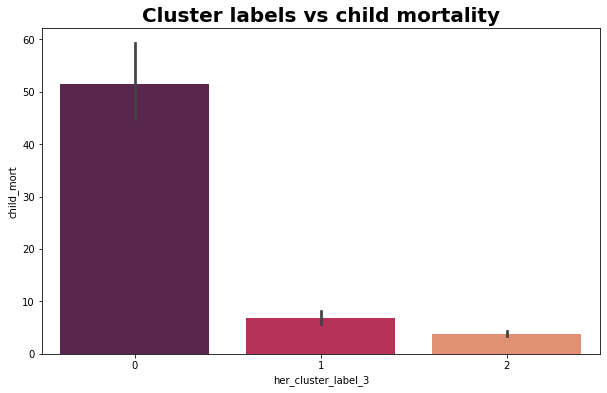

In [50]:
# Analysis of each cluster on the basis child morality rate.
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='child_mort', data=country_df_her,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

#### Inference:
> - Cluster 0 indictes High Child mortality rate where as Cluster 1 and 2 seems to have medium and low Child mortality rate respectively.

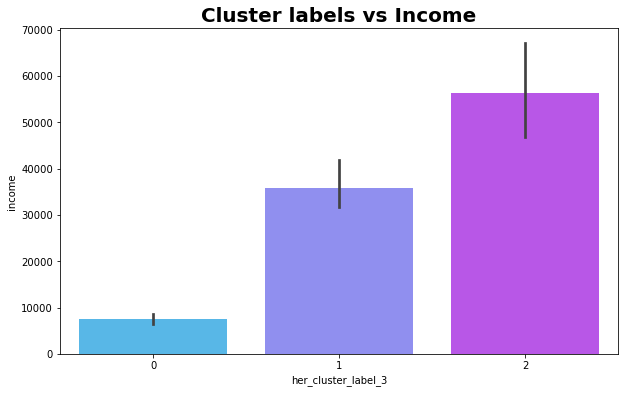

In [51]:
#Analysis of each cluster on the basis Income
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='income', data=country_df_her, palette='cool')
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()

#### Inference:
> - Cluster 0 indictes Low Income where as Cluster 1 and 2 seems to have Medium and High Income respectively.

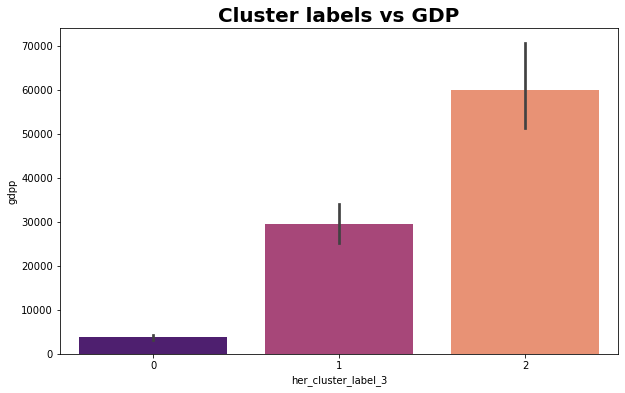

In [52]:
#Analysis of each cluster on the basis child morality rate.
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='gdpp', data=country_df_her, palette='magma')
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)

plt.show()

#### Inference:
> - Cluster 0 indictes Low GDP where as Cluster 1 and 2 seems to have Medium and High GDP respectively.

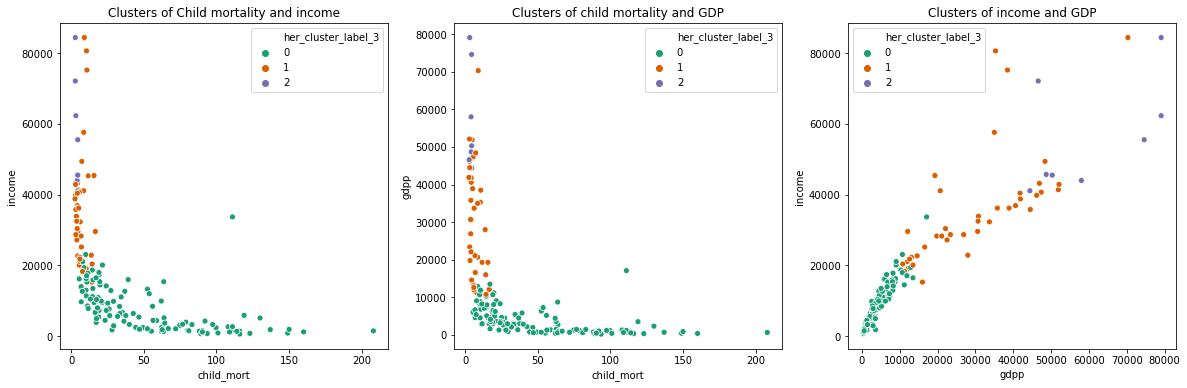

In [53]:
# Analysis of all three data points with all the three clusters
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='her_cluster_label_3',data=country_df_her, palette='Dark2')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='her_cluster_label_3',data=country_df_her, palette='Dark2')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='her_cluster_label_3',data=country_df_her,palette='Dark2')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference: 
> - Child mortality rate is higher at lower income groups indicating inadequate access to healthcare facilities. Reverse of this is also true as can be seen from the graph.
> - Under developed countries tend to have lower GDP and high mortality rate.
> - GDP is directly proportional to the per capita income. Developed countries have a strong GDP and hence a higher per capita income.

## 6.5.1 Combine Analysis based on Child Mortality Rate, Per capita Income  and GDP per capita

In [54]:
# Dropping the Cluster label 4 as it is of no use
country_df_her.drop(["her_cluster_labels_4"],axis = 1, inplace = True)

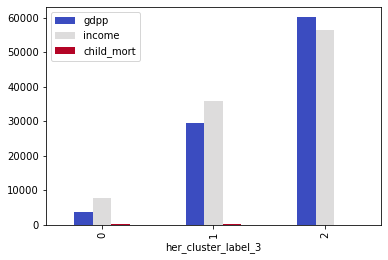

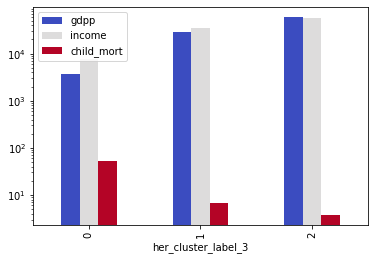

In [55]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_her[['gdpp', 'income', 'child_mort','her_cluster_label_3']].groupby('her_cluster_label_3').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### From the above plots, its evident that the cluster labels
> - Cluster 0 : Those countries which are Under-developed as these countries has Low GDP ,Low Income and High Child mortality rate.
> - Cluster 1 : Those countries which are Developing country as these countries has Medium GDP, Medium Income and Medium Child mortality rate.
> - Cluster 2 : Those countries which are Developed country as these countries has High GDP ,High Income and Low Child morality rate

## 6.5.2 Renaming The Clusters

In [56]:
country_df_her.loc[country_df_her['her_cluster_label_3'] == 0,'her_cluster_label_3'] ='Under-Developed Country'
country_df_her.loc[country_df_her['her_cluster_label_3'] == 1,'her_cluster_label_3'] ='Developing Country'
country_df_her.loc[country_df_her['her_cluster_label_3'] == 2,'her_cluster_label_3'] ='Developed Country'

In [57]:
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Under-Developed Country
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Under-Developed Country
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Under-Developed Country
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Under-Developed Country
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,Developing Country


In [58]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_label_3"].value_counts()

Under-Developed Country    118
Developing Country          41
Developed Country            8
Name: her_cluster_label_3, dtype: int64

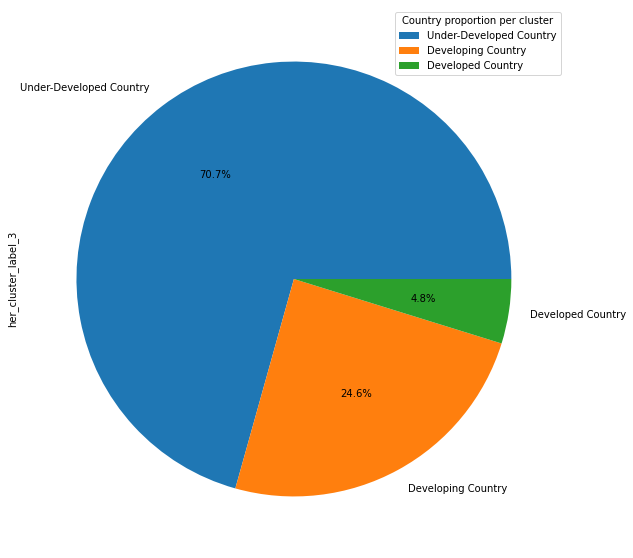

In [59]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
country_df_her["her_cluster_label_3"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

#### Inference:
> - Under-Develop has 70.7 %
> - Developing has 24.6%
> - Developed has 4.8%

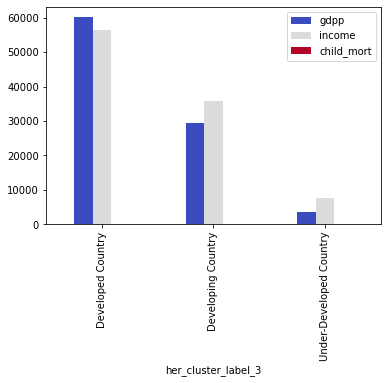

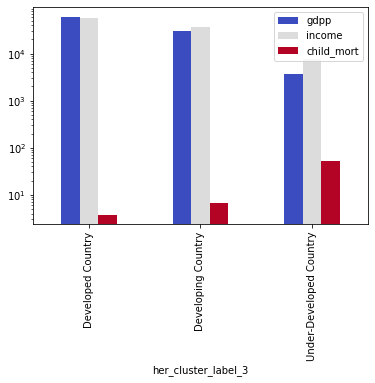

In [60]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_her[['gdpp', 'income', 'child_mort','her_cluster_label_3']].groupby('her_cluster_label_3').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inference
> - Under-developed country : Those countries which are Under-developed as these countries has Low GDP ,Low Income and High Child mortality rate.
> - Developing country : Those countries which are Developing country as these countries has Medium GDP, Medium Income and Medium Child mortality rate.
> - Developed : Those countries which are Developed country as these countries has High GDP ,High Income and Low Child morality rate

# 7 Final Analysis of Hierarchial Clustering

In [61]:
country_df_her[country_df_her['her_cluster_label_3'] == "Under-Developed Country" ].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Under-Developed Country
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Under-Developed Country
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Under-Developed Country
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Under-Developed Country
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.90,75.8,2.37,10300.0,Under-Developed Country


In [62]:
# List down the top 10 contries on the basis of "gdpp","Chil_mort"and "income"
H_top10 = country_df_her[country_df_her['her_cluster_label_3'] == "Under-Developed Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
H_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,Under-Developed Country
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,Under-Developed Country
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,Under-Developed Country
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,Under-Developed Country
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,Under-Developed Country
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,Under-Developed Country
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,Under-Developed Country
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,Under-Developed Country
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,Under-Developed Country
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,Under-Developed Country


# 7.1 Final List Of Countries

In [63]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
Final_hier=H_top10[['country']].head()
hier= Final_hier.reset_index(drop=True)
hier

5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone


# PART II

# 8 K-Means Clustering

## 8.1 Elbow Curve/ SSD

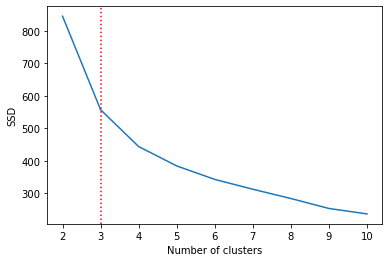

In [64]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

##### Inference:
- From Elbow curve indicates that elbow is at 3,4 and 5 are the optimal number of cluster.
- Let's analysis Silhouette Analysis as well and then get to an conclusion. But as elbow curve 3 will be optimum value of K. 

## 8.2 Silhouette score

For k_clusters=2, the silhouette score is 0.469475
For k_clusters=3, the silhouette score is 0.402781
For k_clusters=4, the silhouette score is 0.390370
For k_clusters=5, the silhouette score is 0.383513
For k_clusters=6, the silhouette score is 0.278475
For k_clusters=7, the silhouette score is 0.290680
For k_clusters=8, the silhouette score is 0.276224
For k_clusters=9, the silhouette score is 0.303273
For k_clusters=10, the silhouette score is 0.304510


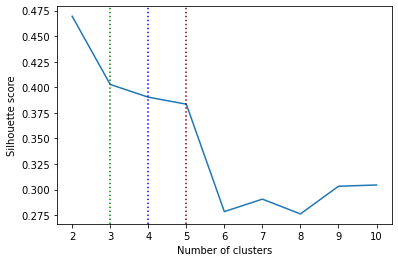

In [65]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))
    
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

#### Inference :
- From Silhouette Analysis 2 score the maximum. But consider 2 clusters will be very less. And the segmentation of the countries will be very different.
- After 2 if check for the next optimal value of clusters will be 3,4 & 5.
- From the Elbow curve and Silhouette Analysis can conclude that the best optimal number of cluster would be 3.
- Lets use K-means algorithm for values of k to be 3,4 & 5. And the check the result of  cluster Profiling.

## 8.3 K-means with Iteration 3,4 & 5

## 8.3.1 First Iteration with Cluster = 3

In [66]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_3.fit(country_scaled)
kmeans_3.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [67]:
# assign cluster labels
country_df_K = country_df.copy()
country_df_K['K_Cluster_3_Label'] = kmeans_3.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [68]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_3_Label"].value_counts()

1    90
0    48
2    29
Name: K_Cluster_3_Label, dtype: int64

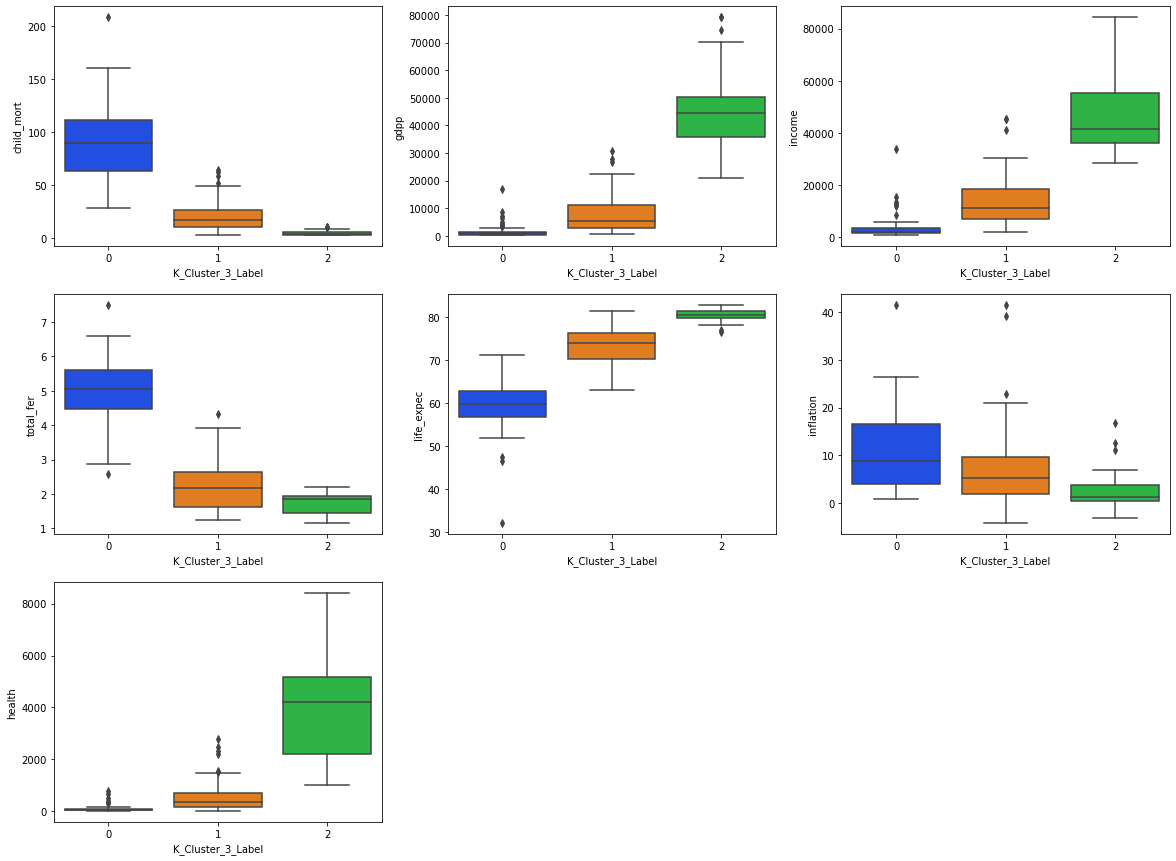

In [69]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_3_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_3_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_3_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_3_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_3_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_3_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_3_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:
> - child_mort : Cluster 0 has High Child mortality rate where as Cluster 1 and 2 has medium and low respectively.
> - gdpp: Cluster 0 has very low GDP where as Cluster 1 has medium  GDP and Cluster 2 has Very High GDP.
> - income: Cluster 0 has very low Income with few Outliers where Cluster 1 has medium  Income and Cluster 2 has Very High Income
> - total_fer: Cluster 0 has very High fertility rate where has Cluster 1 has low and Cluster 2 has very low fertility rate.
> - life_expec: Cluster 0 has Life expectence between age from 40 to 80 where as Cluster 1 and 2 has life expectency beyond 80 also.
> - inflation: Cluster 0 has high inflation where as cluster 1 has low Inflation and cluster 2 has less then cluster 1 inflation rate.
> - health: Cluster 0 has very less amount of income spend in helth where as cluster 1 has medium and cluster 2 has high amount of income spend in health respectively.
> - There are few outliers in the all the variables.But we will keep the Outliers as it is as if we treat the outliers It may remove those countries which are in need of AID.

In [70]:
# checking countries in cluster 2

country_df_K[country_df_K['K_Cluster_3_Label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,2
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,2
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,2
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,2
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,2
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,2
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,2


In [71]:
# checking countries in cluster 1

country_df_K[country_df_K['K_Cluster_3_Label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.490,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.100,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.440,76.8,2.13,12200.0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.900,75.8,2.37,10300.0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.770,73.3,1.69,3220.0,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.910,76.4,2.08,11900.0,1
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.500,68.8,2.34,1380.0,1
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.620,63.0,3.50,2970.0,1
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,41.478,75.4,2.47,13500.0,1


In [72]:
# checking countries in cluster 0

country_df_K[country_df_K['K_Cluster_3_Label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


#### Inference:
> - The Distribution of the cluster in Kmeans is is quite Uniform distributed as compared to Hierarchial.
> - Let's Check Second Iteration and conclude the Final Analysis.

## 8.3.2  Second Iteration with Cluster = 4

In [73]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_4.fit(country_scaled)
kmeans_4.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [74]:
# assign cluster labels
country_df_K["K_Cluster_4_Label"] = kmeans_4.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2


In [75]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_4_Label"].value_counts()

2    82
0    48
1    28
3     9
Name: K_Cluster_4_Label, dtype: int64

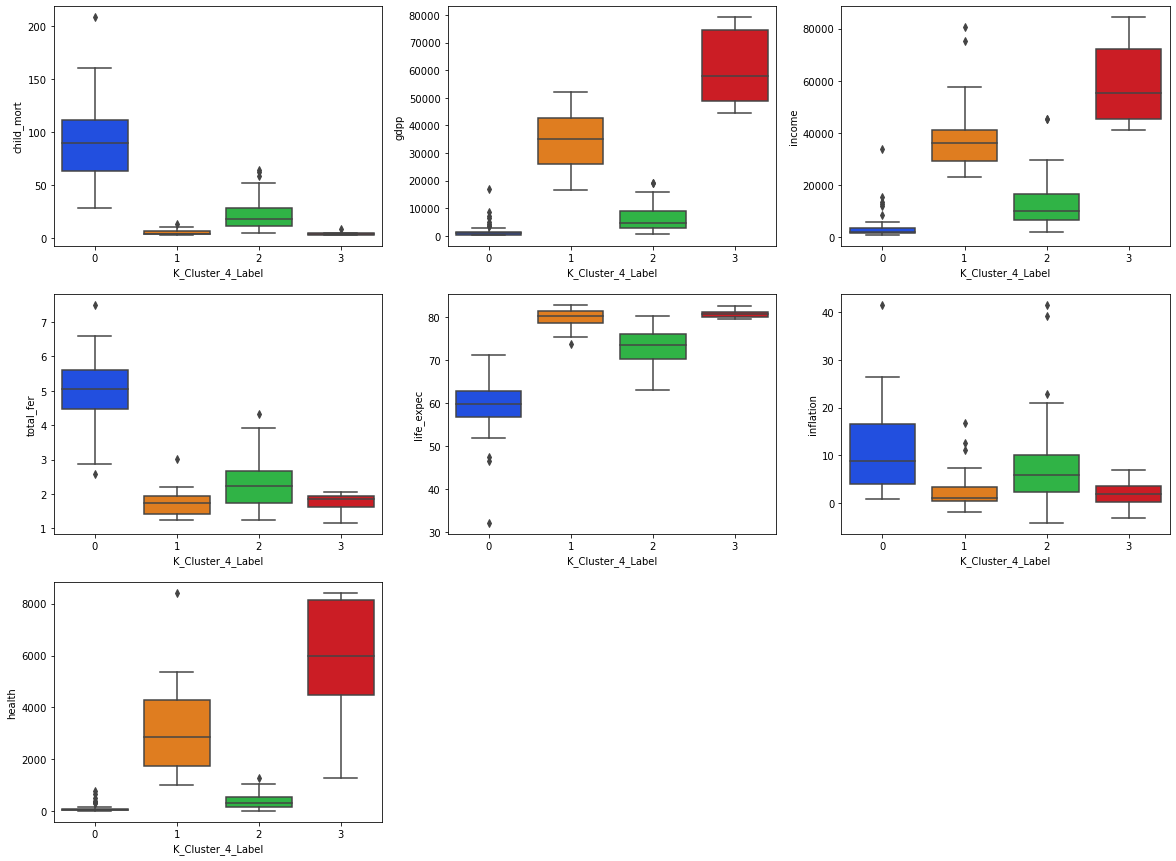

In [76]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_4_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_4_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_4_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_4_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_4_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_4_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_4_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:
> - In the second Iteration model has created a new cluster 3 with only Nine countries which has Low Child mortality rate,Fertility rate and Inflation and High GDP,Income,Life expectency and Helth
> - The countries belongs to the cluster 3 can be consider to be developed countries

In [77]:
# checking countries in cluster 3

country_df_K[country_df_K['K_Cluster_4_Label'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,3
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,3
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,3
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,3
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,3
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,3
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,2,3
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,3
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,3


In [78]:
# checking countries in cluster 2

country_df_K[country_df_K['K_Cluster_4_Label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.490,76.3,1.65,4090.0,1,2
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.100,76.5,2.89,4460.0,1,2
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.440,76.8,2.13,12200.0,1,2
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.900,75.8,2.37,10300.0,1,2
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.770,73.3,1.69,3220.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.910,76.4,2.08,11900.0,1,2
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.500,68.8,2.34,1380.0,1,2
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.620,63.0,3.50,2970.0,1,2
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,41.478,75.4,2.47,13500.0,1,2


In [79]:
# checking countries in cluster 1

country_df_K[country_df_K['K_Cluster_4_Label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,2,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,2,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,2,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,2,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,2,1
43,Czech Republic,3.4,13068.0,1560.2400,12454.2,28300.0,-1.430,77.5,1.51,19800.0,1,1
53,Finland,3.0,17879.4,4134.9000,17278.8,39800.0,0.351,80.0,1.87,46200.0,2,1
54,France,4.2,10880.8,4831.4000,11408.6,36900.0,1.050,81.4,2.03,40600.0,2,1


In [80]:
# checking countries in cluster 0

country_df_K[country_df_K['K_Cluster_4_Label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,0


## 6.4 Third Iteration With Cluster = 5

In [81]:
# K Means with with k=3
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_5.fit(country_scaled)
kmeans_5.labels_

array([2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 3, 3, 0, 2, 0, 1, 1,
       4, 0, 0, 0, 0, 3, 2, 0, 0, 1, 1, 3, 2, 0, 1, 3, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 3, 4, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 4, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0,
       4, 1, 2, 3, 4, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 4, 1, 1, 2, 2, 1, 1, 0, 0, 3, 0, 1, 4, 0, 2, 0, 3, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2])

In [82]:
country_df_K["K_Cluster_5_Label"] = kmeans_5.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2,0


In [83]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_5_Label"].value_counts()

0    80
2    36
1    28
3    14
4     9
Name: K_Cluster_5_Label, dtype: int64

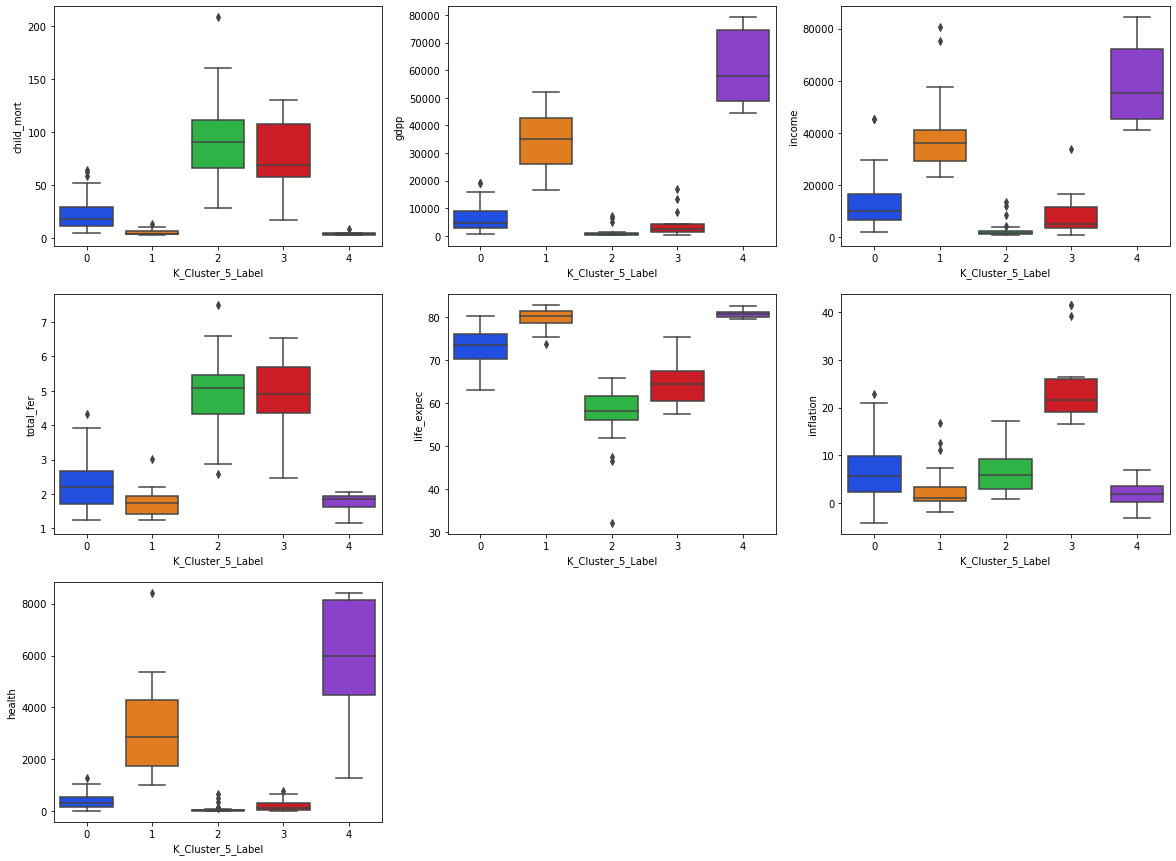

In [84]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_5_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_5_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_5_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_5_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_5_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_5_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_5_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:
> - From the box plots we can see that cluster 1 and cluster 4 both have High GDP,Income and Health spending.
> - Above box plot we can see that both cluster 1 and cluster 4 has Low Child mortatlity,Fertility rate and low Inflation
> - From the box plots we can see the both the cluster show similar pattern.Increasing the cluster doesn't make sense.
> - Both the clusters indicates that the countries belong to these cluster are developed countries . Thus, we will not go with 5 cluster model. We will finalize with Model 1 with 3 K-Means Cluster models

In [85]:
# checking countries in cluster 5

country_df_K[country_df_K['K_Cluster_5_Label'] == 4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,3,4
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,3,4
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,3,4
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,3,4
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,3,4
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,3,4
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,2,3,4
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,3,4
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,3,4


In [86]:
# checking countries in cluster 3

country_df_K[country_df_K['K_Cluster_5_Label'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0,3
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,0,3
38,"Congo, Rep.",63.9,2331.740,67.4040,1498.780,5190.0,20.700,60.4,4.95,2740.0,0,0,3
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700.0,24.900,60.9,5.21,17100.0,0,0,3
55,Gabon,63.7,5048.750,306.2500,1653.750,15400.0,16.600,62.9,4.08,8750.0,0,0,3
59,Ghana,74.7,386.450,68.3820,601.290,3060.0,16.600,62.2,4.27,1310.0,0,0,3
72,Iraq,36.9,1773.000,378.4500,1534.500,12700.0,16.600,67.2,4.56,4500.0,0,0,3
99,Mauritania,97.4,608.400,52.9200,734.400,3320.0,18.900,68.2,4.98,1200.0,0,0,3
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710.0,39.200,66.2,2.64,2650.0,1,2,3
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,0,0,3


In [87]:
# checking countries in cluster 2

country_df_K[country_df_K['K_Cluster_5_Label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,0,0,2


In [88]:
# checking countries in cluster 1

country_df_K[country_df_K['K_Cluster_5_Label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,2,1,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,2,1,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1,1,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1,1,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,2,1,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,2,1,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,2,1,1
43,Czech Republic,3.4,13068.0,1560.2400,12454.2,28300.0,-1.430,77.5,1.51,19800.0,1,1,1
53,Finland,3.0,17879.4,4134.9000,17278.8,39800.0,0.351,80.0,1.87,46200.0,2,1,1
54,France,4.2,10880.8,4831.4000,11408.6,36900.0,1.050,81.4,2.03,40600.0,2,1,1


In [89]:
# checking countries in cluster 0

country_df_K[country_df_K['K_Cluster_5_Label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,2,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,2,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,2,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,1,2,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,1398.87,229.284,1517.67,7820.0,13.40,70.4,1.44,2970.0,1,2,0
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,1,2,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,1,2,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,1,2,0


#### Inference:
> - Analysis of Thrid Iteration:  From the third iteration cluster 1 and cluster 4  show similar pattern.Both the clusters indicates that the countries belong to these cluster are developed countries.Increasing the cluster doesn't make sense and the 5 cluster model do not make any improvement in the Clustering situation. Thus, we will not go with 5 cluster model.
> - Analysis of Second Iteration: 4 Clusters has only Nine countries. There is no uniformility in the cluster distribution and No drastic change in clusters.Hence 4 cluster model do not improve the clustering situation.  
> - Analysis of First Iteration: As from above three iteration we can conclude that the cluster = 3 has ideal number of clusters.  

###  Now let's validate first iteration with cluster = 3

## 8.4 K-means Cluster Profiling

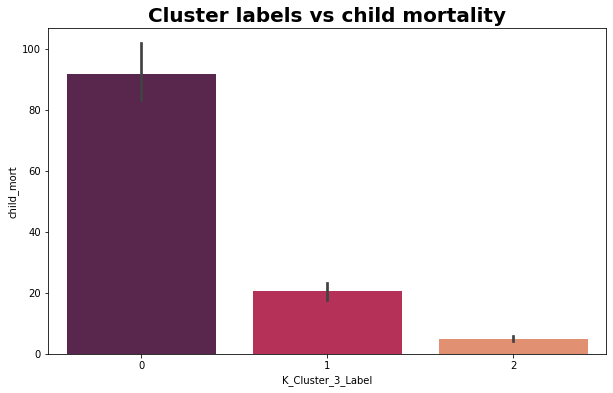

In [90]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='child_mort', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

# Inference:
> - Cluster 0 has High Child mortality rate and Cluster 1 and 2 has medium and low child mortatlity rate.

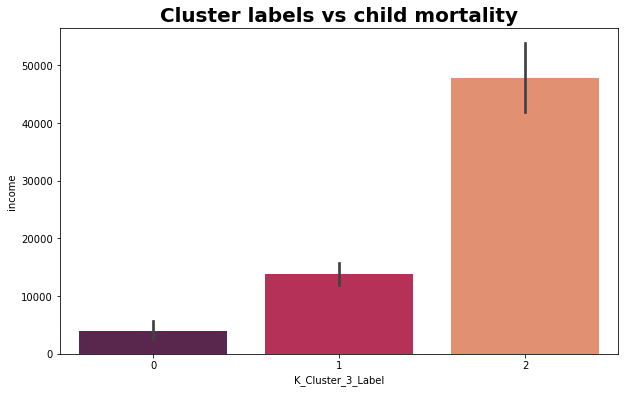

In [91]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='income', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

#### Inference:
> - Cluster 0 has Low Income and cluster 1 and 2 has High Income.

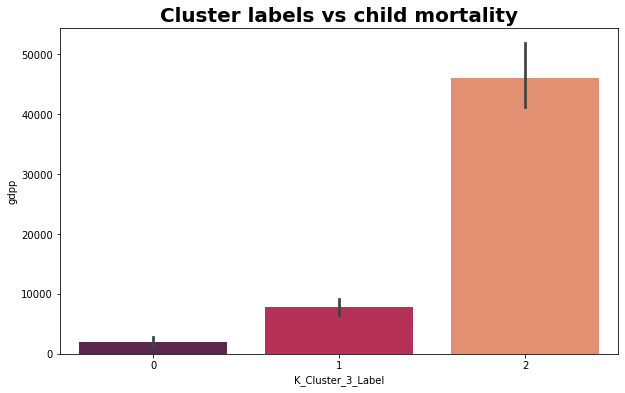

In [92]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='gdpp', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

#### Inference:
> - Cluster 0 has Low GDP and cluster 1 and 2 has High GDP.

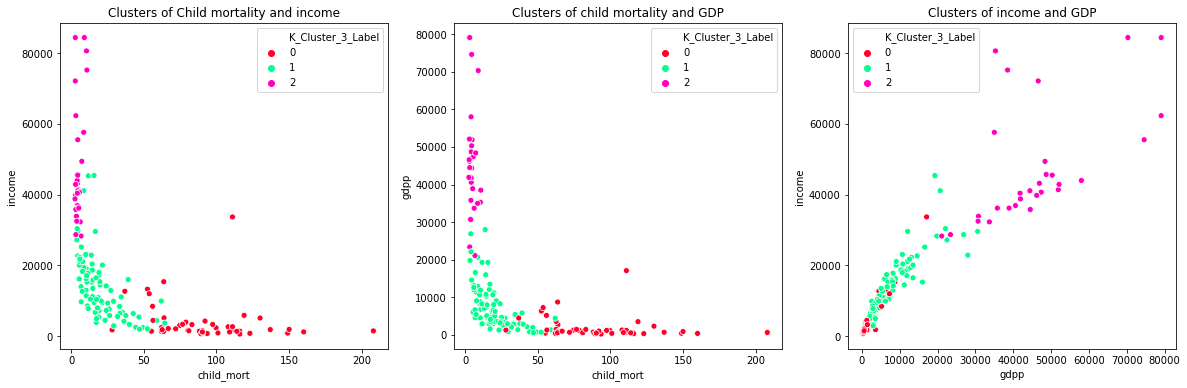

In [93]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='K_Cluster_3_Label',data=country_df_K,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference:
> - Child mortality rate is higher at lower income groups indicating inadequate access to healthcare facilities. Reverse of this is also true as can be seen from the graph.
> - Under developed countries tend to have lower GDP and high mortality rate.
> - GDP is directly proportional to the per capita income. Developed countries have a strong GDP and hence a higher per capita income.

## 8.3.1 Combine Analysis based on Child Mortality Rate, Per capita Income  and GDP per capita

In [94]:
country_df_K.drop(["K_Cluster_4_Label","K_Cluster_5_Label"],axis = 1, inplace = True)

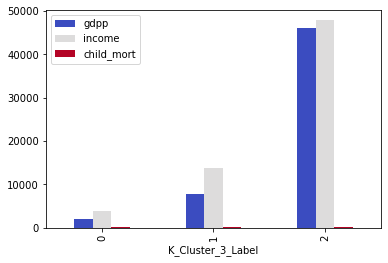

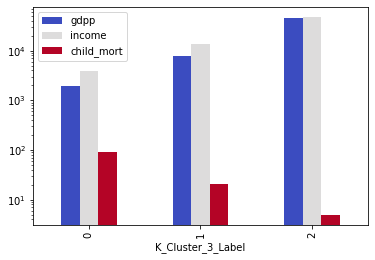

In [95]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_K[['gdpp', 'income', 'child_mort','K_Cluster_3_Label']].groupby('K_Cluster_3_Label').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inference:
> - 0 : Medium GDPP, medium Income and mild child mortality rate.
> - 1 : High GDPP, High income and very low child mortality rate.
> - 2 : Low GDPP, Low income and very high mortality rate.

## 8.3.2 Renaming The Clusters

In [96]:
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 0,'K_Cluster_3_Label'] ='Under-Develop Country'
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 1,'K_Cluster_3_Label'] ='Developing Country'
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 2,'K_Cluster_3_Label'] ='Developed Country'

In [97]:
country_df_K["K_Cluster_3_Label"].value_counts()

Developing Country       90
Under-Develop Country    48
Developed Country        29
Name: K_Cluster_3_Label, dtype: int64

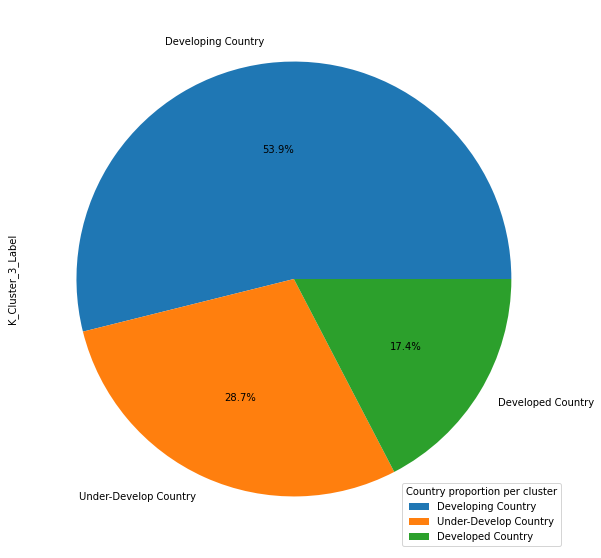

In [98]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
country_df_K["K_Cluster_3_Label"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

#### Inference:
> - Under- Develope country has 28.7%
> - Developing country has 53.9%
> - Developed country has 17.4%

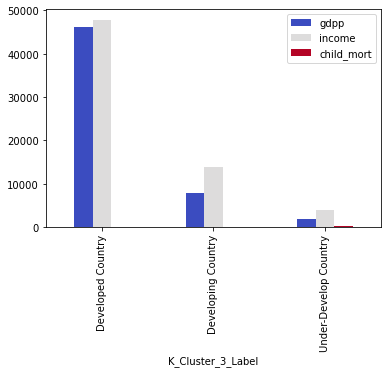

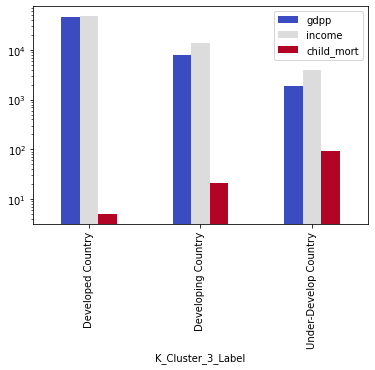

In [99]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_K[['gdpp', 'income', 'child_mort','K_Cluster_3_Label']].groupby('K_Cluster_3_Label').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inference
> - Under-developed country : Those countries which are Under-developed as these countries has Low GDP ,Low Income and High Child mortality rate.
> - Developing country : Those countries which are Developing country as these countries has Medium GDP, Medium Income and Medium Child mortality rate.
> - Developed : Those countries which are Developed country as these countries has High GDP ,High Income and Low Child morality rate

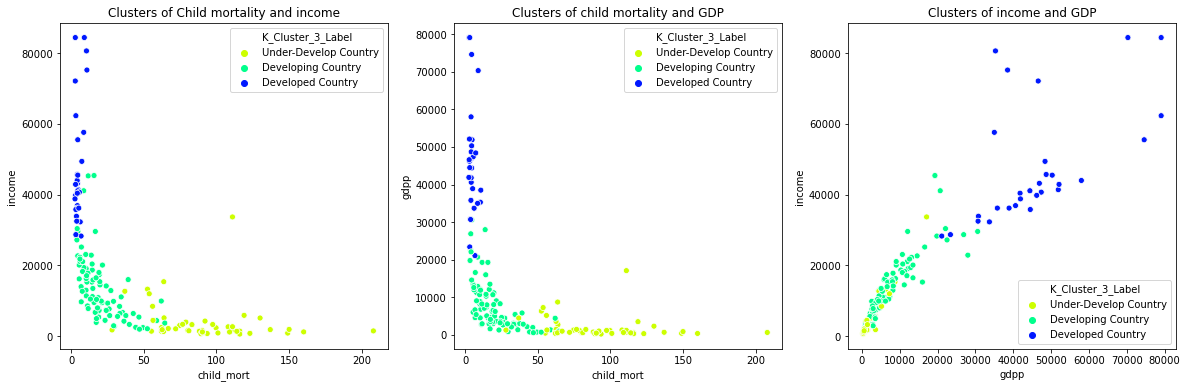

In [100]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='K_Cluster_3_Label',data=country_df_K,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference:
> - Developing countries have Medium GDPP, medium Income and mild child mortality rate.
> - Developed countries have High GDPP, High income and very low child mortality rate.
> - Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

# 9 Final Analysis of K-means Clustering

In [101]:
# Final Analysis
country_df_K[country_df_K['K_Cluster_3_Label'] == "Under-Develop Country" ].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,Under-Develop Country
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,Under-Develop Country
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,Under-Develop Country
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,Under-Develop Country
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,Under-Develop Country


In [102]:
# Lists of Top 10 countries which are need of AID on the basis "gdpp","child_mort" and "income"
K_top10 = country_df_K[country_df_K['K_Cluster_3_Label'] == "Under-Develop Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
K_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,Under-Develop Country
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,Under-Develop Country
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,Under-Develop Country
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,Under-Develop Country
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,Under-Develop Country
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,Under-Develop Country
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,Under-Develop Country
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,Under-Develop Country
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,Under-Develop Country
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,Under-Develop Country


# 9.1 Final List Of Countries

In [103]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
Final_Kmeans=K_top10[['country']].head()
K_means_c= Final_Kmeans.reset_index(drop=True)
K_means_c

5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone


# 10. Conclusion

In [104]:
list(country_df_K.country)==list(country_df_her.country)

True

### Analysis of K-means and Hierarchical clustering indicates that both the analysis returns same list of 10 countries which are in need of aid. 
> Based on the clusters made by K-means each clusters are evenly distributed is better as compared to the Hierarchical clustering.
> K-means shows better clustering mechanism 
> Around 48 countries are Under-developed countries  in K-means.

### Hence choosing K-means as the Final model for clustering 

<Figure size 144x1800 with 0 Axes>

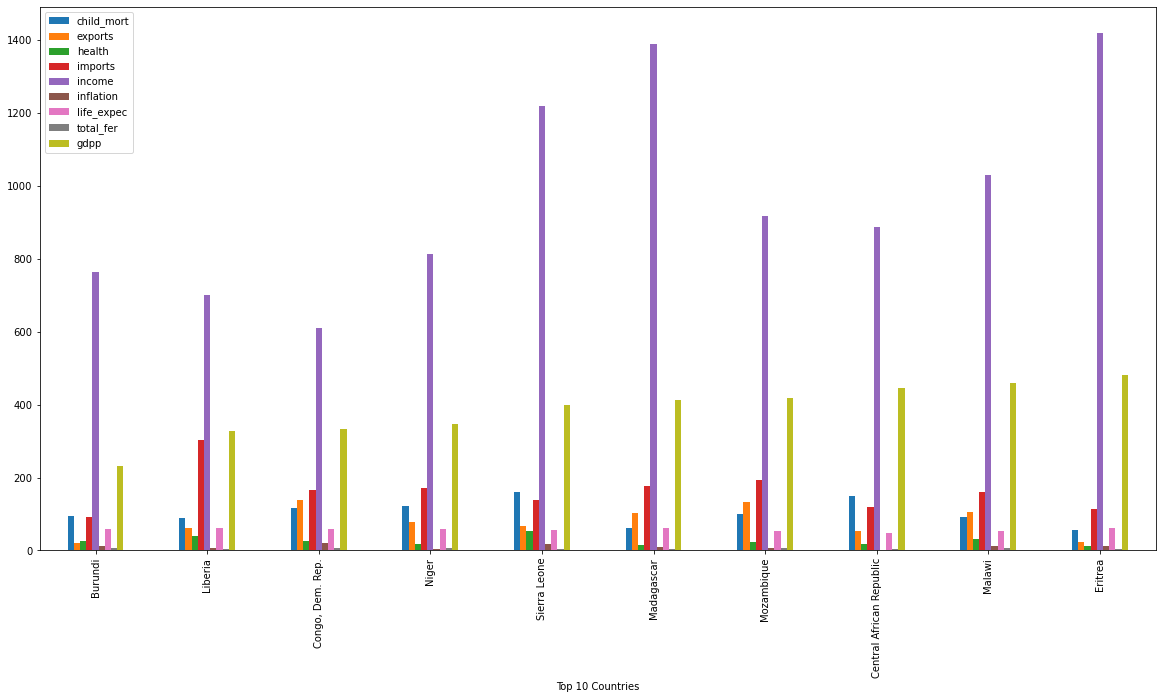

In [105]:
plt.figure(figsize=(2,25))
K_top10.set_index('country').plot(kind='bar',figsize=(20,10))
plt.xlabel('Top 10 Countries')
plt.show()


In [106]:
cols = ['gdpp', 'income', 'child_mort']
def results_plots(df_name):
    plt.figure(figsize=[20,15])
    for i,column_name in enumerate(cols):
        plt.subplot(2,2,i+1)
        ax = sns.barplot(x='country', y=column_name, data= df_name)
        for each_bar in ax.patches:
            ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01,))
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.ylabel(column_name)
        plt.xlabel('Countries which have poor %s' %column_name)

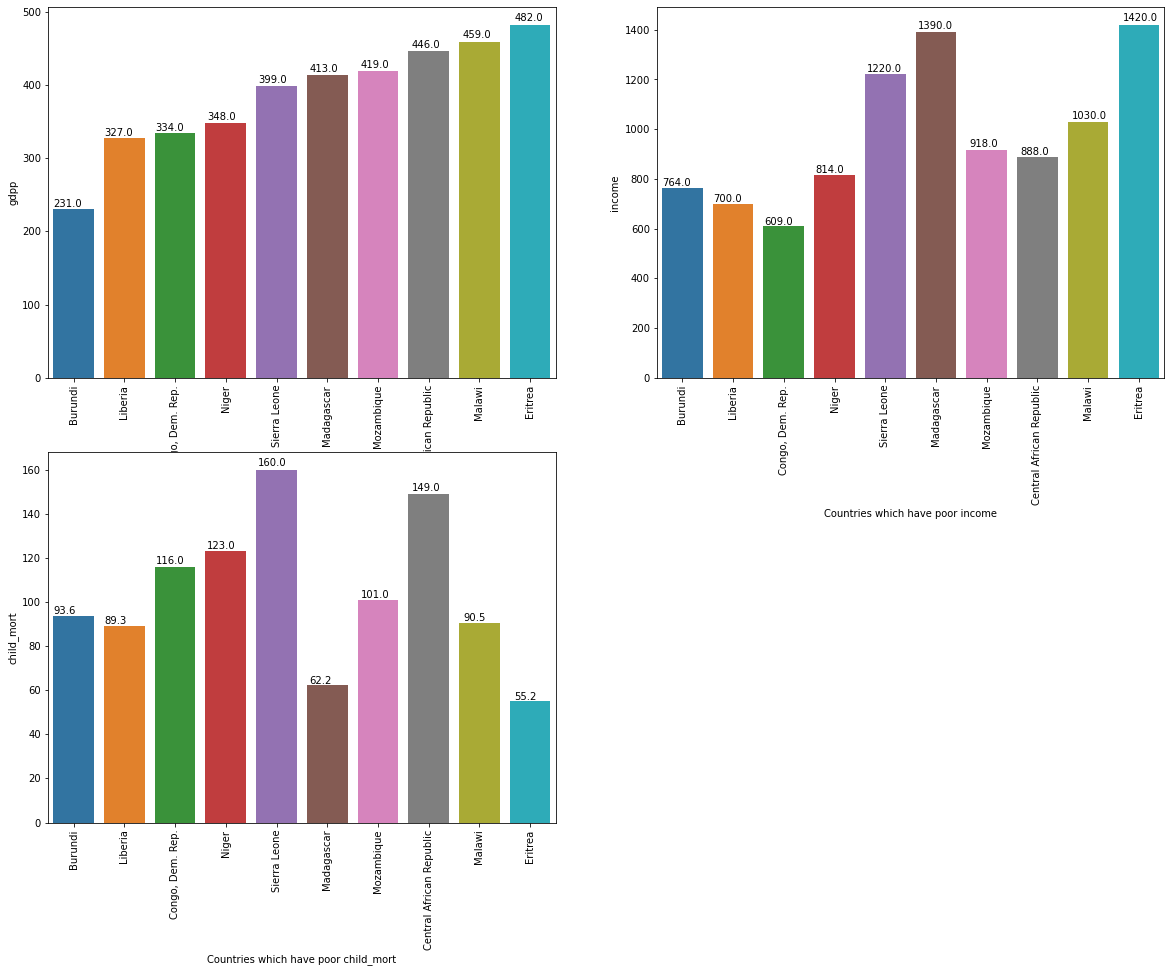

In [107]:
results_plots(K_top10)

## Recommendation for Help International for Top 5 countries that are in need of aid:
### Countries that are in need of aid:
#### The following 5 are the countries which have to be provided aid first:

> - Burundi
> - Liberia
> - Congo, Dem. Rep.
> - Niger
> - Sierra Leone

### Reasons for Aid:
> - High child mortality
> - Low Income
> - Low GDP
> - Low health spent
> - High Inflation
> - Lower life expectency
> - High fertility rate (i.e more number of children per family/woman)
#### Once the above countries are provided with Aid, the following are the next set of countries which would require aid in order to reduce the child mortality rate and improve their GDPP and income per person:

> - Madagascar
> - Mozambique
> - Central African Republic
> - Malawi
> - Eritrea